<h1><pre>                   Vehicle Silhouettes</pre></h1>
<h2>Goal of collecting this dataset:</h2>
The goal of collecting this dataset is to determine the category of a given vehicle silhouette among three types (car, van, bus) by utilizing a set of extracted silhouette-based features.

<h2>Classification:</h2>
The classification of vehicle silhouettes involves the utilization of a set of distinctive attributes extracted from these silhouettes. The primary objective is to categorize these silhouettes into one of three predefined classes: cars, vans, or buses.

<h2>Clustering:</h2>
Clustering vehicle silhouettes entails organizing similar data based on their shared characteristics to create distinct clusters. Various methods will be utilized to determine the number of clusters that best suit our dataset, followed by evaluation techniques to assess the effectiveness of these clusters in segmenting the data effectively based on their inherent features.

<h2>Defect prediction:</h2>
Defect prediction in a dataset of vehicle silhouettes involves spotting potential issues or irregularities within these silhouette images. This process may encompass the detection of inconsistencies or abnormalities in the silhouettes, including the presence of missing data points, which can be problematic. Leveraging data mining techniques, defect prediction enhances the dataset's overall quality and dependability, ensuring it faithfully reflects the desired information. This, in turn, reduces the risk of producing inaccurate or deceptive outcomes when the dataset is applied in subsequent tasks and applications, such as object recognition and classification.

<h4>Link Of dataset:</h4>
<a href=https://www.kaggle.com/datasets/pritech/vehicle-silhouettes/data>link of dataset</a>

Number of attribute:
19
Number of objects:
847

In [111]:
setwd("C:/Users/Tshah/OneDrive/Desktop/326/project")

In [112]:
dataset<-read.csv('vehicle.csv')
databeforereprossess<-read.csv('vehicle.csv')

<h3> Here is some general information about our dataset:</h3>
<h4>Before reprocessing</h4>

In [16]:
head(dataset)

compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,car
93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
107,NA,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus


<p>Reviewing a section of our dataset, it's evident that there are missing values, significant ranges in certain data, and our dataset comprises numeric values to predict our categorical class label.</p>

In [17]:
str(dataset)

'data.frame':	846 obs. of  19 variables:
 $ compactness                : int  95 91 104 93 85 107 97 90 86 93 ...
 $ circularity                : int  48 41 50 41 44 NA 43 43 34 44 ...
 $ distance_circularity       : int  83 84 106 82 70 106 73 66 62 98 ...
 $ radius_ratio               : int  178 141 209 159 205 172 173 157 140 NA ...
 $ pr.axis_aspect_ratio       : int  72 57 66 63 103 50 65 65 61 62 ...
 $ max.length_aspect_ratio    : int  10 9 10 9 52 6 6 9 7 11 ...
 $ scatter_ratio              : int  162 149 207 144 149 255 153 137 122 183 ...
 $ elongatedness              : int  42 45 32 46 45 26 42 48 54 36 ...
 $ pr.axis_rectangularity     : int  20 19 23 19 19 28 19 18 17 22 ...
 $ max.length_rectangularity  : int  159 143 158 143 144 169 143 146 127 146 ...
 $ scaled_variance            : int  176 170 223 160 241 280 176 162 141 202 ...
 $ scaled_variance.1          : int  379 330 635 309 325 957 361 281 223 505 ...
 $ scaled_radius_of_gyration  : int  184 158 220 127 188 26

<p>As we can see our dataset consists of 18 integer columns primarily designed for  classification purposes, aiding in the distinction of various vehicle types such as cars, vans, and buses. These 18 integer-based metrics provide a detailed perspective on diverse vehicle attributes, enabling precise and reliable classification.</p>

<h6> The following information is about number of rows and columns:</h6>

In [3]:
##The number of rows:
nrow(dataset)

[1] 846

In [4]:
##The number of columns:
ncol(dataset)

[1] 19

In [5]:
##Lets check summary of our attributes
summary(dataset)

  compactness      circularity    distance_circularity  radius_ratio  
 Min.   : 73.00   Min.   :33.00   Min.   : 40.00       Min.   :104.0  
 1st Qu.: 87.00   1st Qu.:40.00   1st Qu.: 70.00       1st Qu.:141.0  
 Median : 93.00   Median :44.00   Median : 80.00       Median :167.0  
 Mean   : 93.68   Mean   :44.83   Mean   : 82.11       Mean   :168.9  
 3rd Qu.:100.00   3rd Qu.:49.00   3rd Qu.: 98.00       3rd Qu.:195.0  
 Max.   :119.00   Max.   :59.00   Max.   :112.00       Max.   :333.0  
                  NA's   :5       NA's   :4            NA's   :6      
 pr.axis_aspect_ratio max.length_aspect_ratio scatter_ratio   elongatedness  
 Min.   : 47.00       Min.   : 2.000          Min.   :112.0   Min.   :26.00  
 1st Qu.: 57.00       1st Qu.: 7.000          1st Qu.:147.0   1st Qu.:33.00  
 Median : 61.00       Median : 8.000          Median :157.0   Median :43.00  
 Mean   : 61.68       Mean   : 8.567          Mean   :168.9   Mean   :40.93  
 3rd Qu.: 65.00       3rd Qu.:10.000      

<p>We can observe that our dataset has a limited number of missing values, which we will identify and address as we progress through the dataset</p>

<h5>We can inspect our data sourced from the .csv file available on GitHub. This dataset comprises 18 columns of various information, with one specifically labeled (Class), serving as our designated class label.</h5>

In [23]:
sum(duplicated(dataset))

[1] 0

<h4>Lets check for missing values:</h4>

In [3]:
##checking null values
is.na(dataset)

compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [4]:
##checking for null values
sum(is.na(dataset))

[1] 41

In [35]:
attributes(dataset)
##where class is our class label

$names
 [1] "compactness"                 "circularity"                
 [3] "distance_circularity"        "radius_ratio"               
 [5] "pr.axis_aspect_ratio"        "max.length_aspect_ratio"    
 [7] "scatter_ratio"               "elongatedness"              
 [9] "pr.axis_rectangularity"      "max.length_rectangularity"  
[11] "scaled_variance"             "scaled_variance.1"          
[13] "scaled_radius_of_gyration"   "scaled_radius_of_gyration.1"
[15] "skewness_about"              "skewness_about.1"           
[17] "skewness_about.2"            "hollows_ratio"              
[19] "class"                      

$class
[1] "data.frame"

$row.names
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
[181] 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
[199] 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
[217] 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
[235] 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
[253] 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
[271] 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
[289] 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
[307] 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324
[325] 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342
[343] 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360
[361] 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378
[379] 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396
[397] 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414
[415] 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432
[433] 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450
[451] 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468
[469] 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486
[487] 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504
[505] 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522
[523] 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540
[541] 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558
[559] 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576
[577] 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594
[595] 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611 612
[613] 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630
[631] 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647 648
[649] 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665 666
[667] 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683 684
[685] 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 701 702
[703] 703 704 705 706 707 708 709 710 711 712 713 714 715 716 717 718 719 720
[721] 721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737 738
[739] 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755 756
[757] 757 758 759 760 761 762 763 764 765 766 767 768 769 77

In [63]:
# import necessary libraries
library(dplyr)
library(tidyr)
library(readr)
library(outliers)



<h3>The following is graphs of some of our attribute to understand it more.</h3>

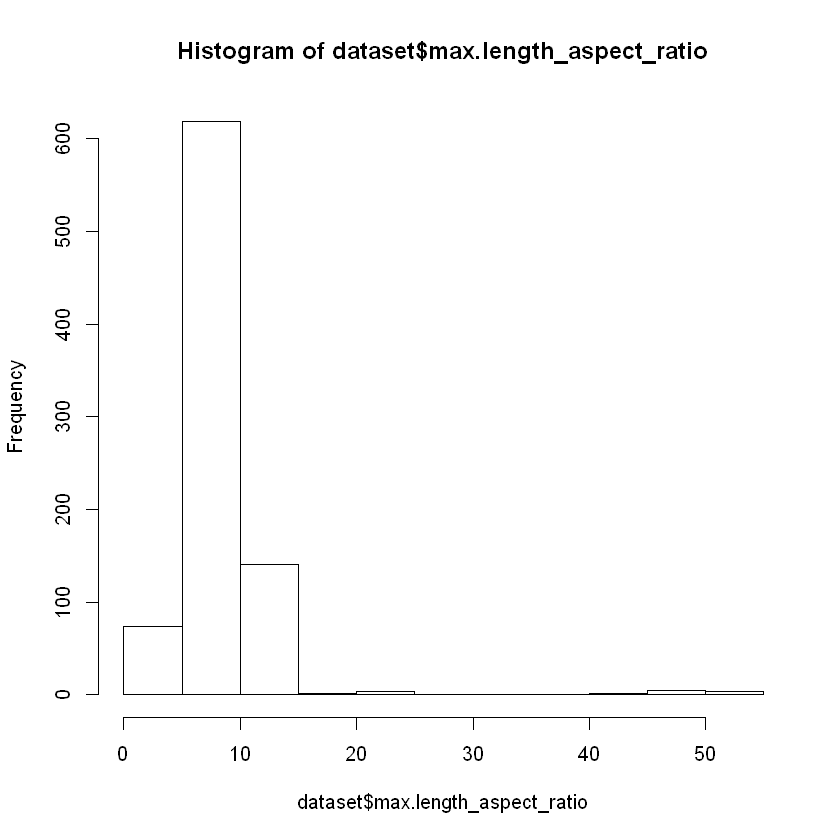

In [32]:
hist(dataset$max.length_aspect_ratio)

<p>The histogram shows the freguency  of the max length aspect ratio which varies widely depending on the type and purpose of the vehicle which will help us in categorizing it.</p>

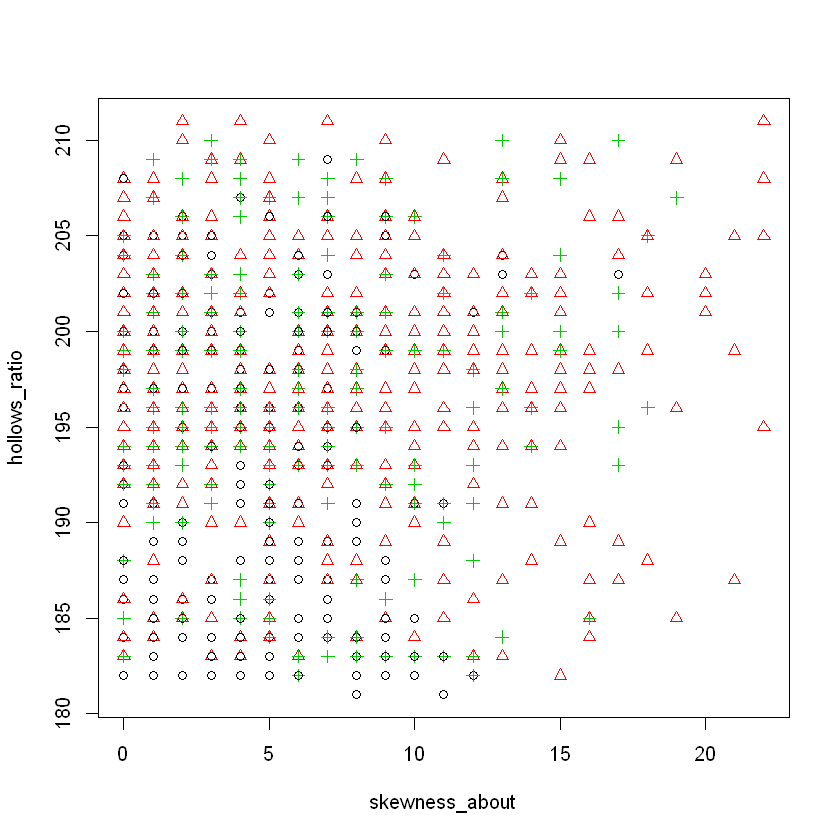

In [33]:
with(dataset, plot(skewness_about, hollows_ratio, col = class, pch = as.numeric(class)))

<p>As we can see our class is spread out according to the columns we have chosen.</p>

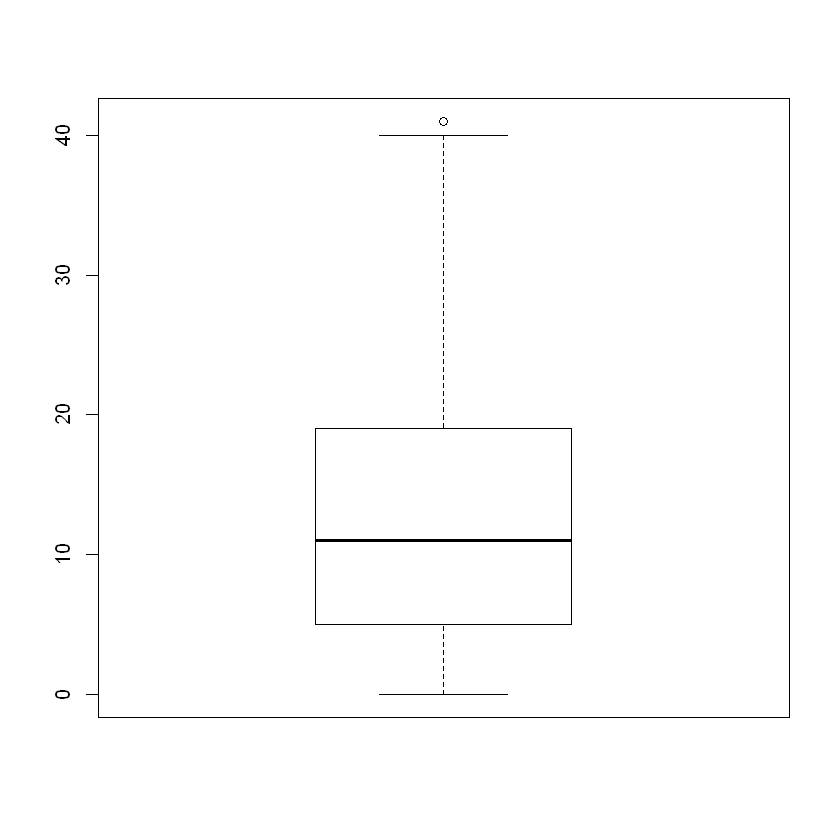

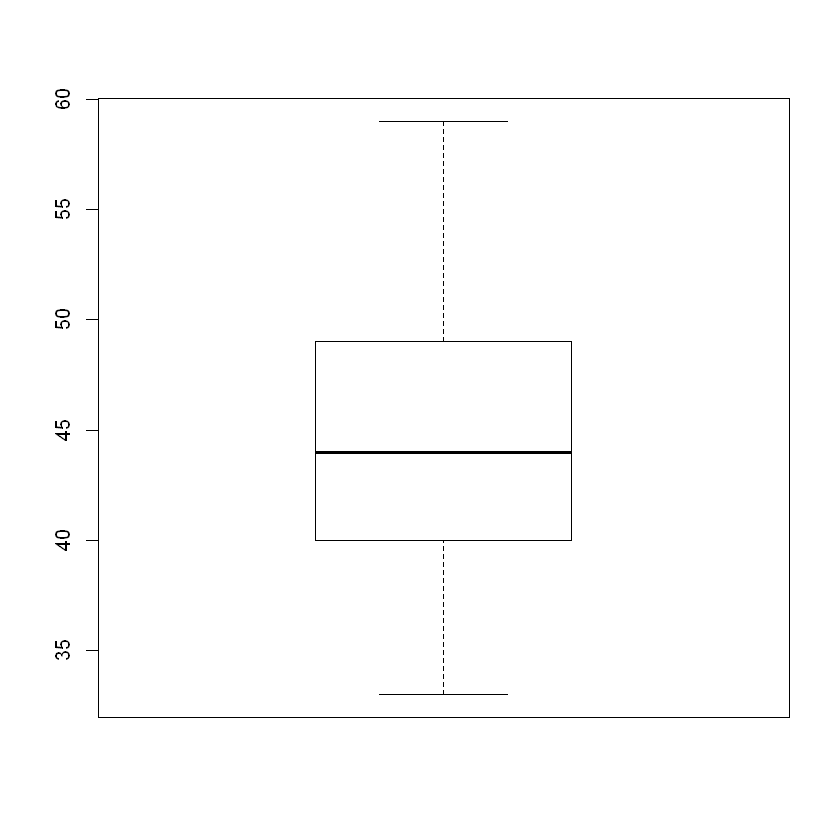

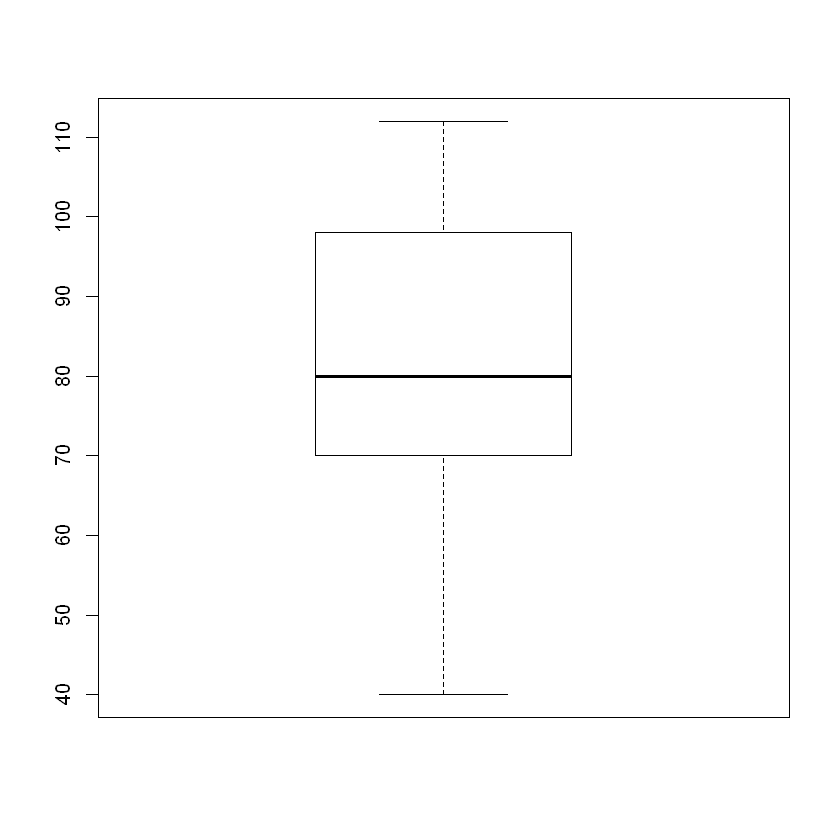

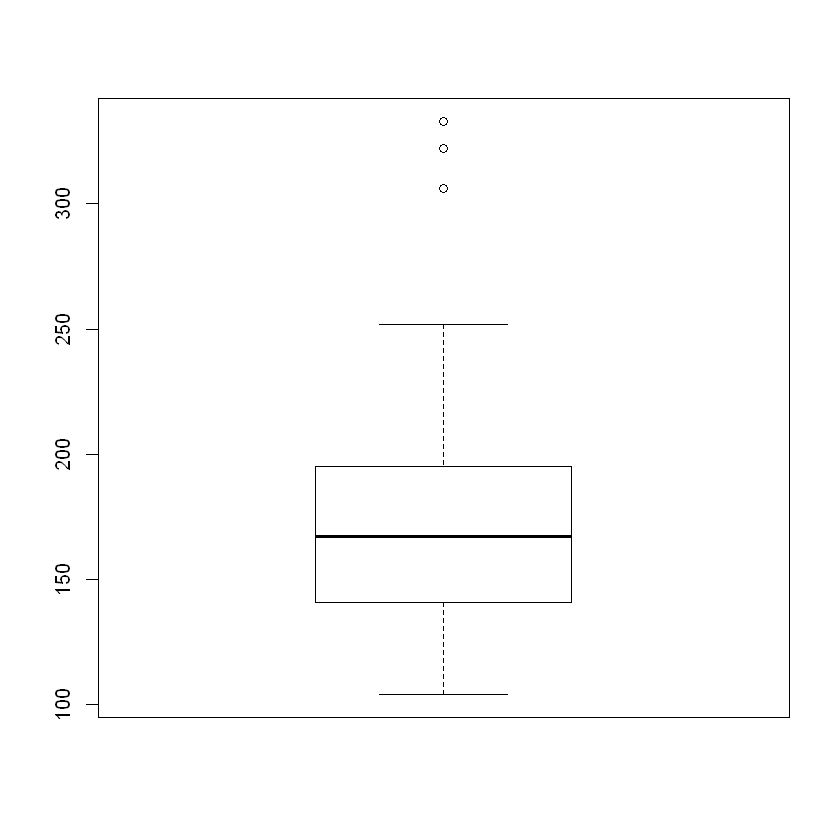

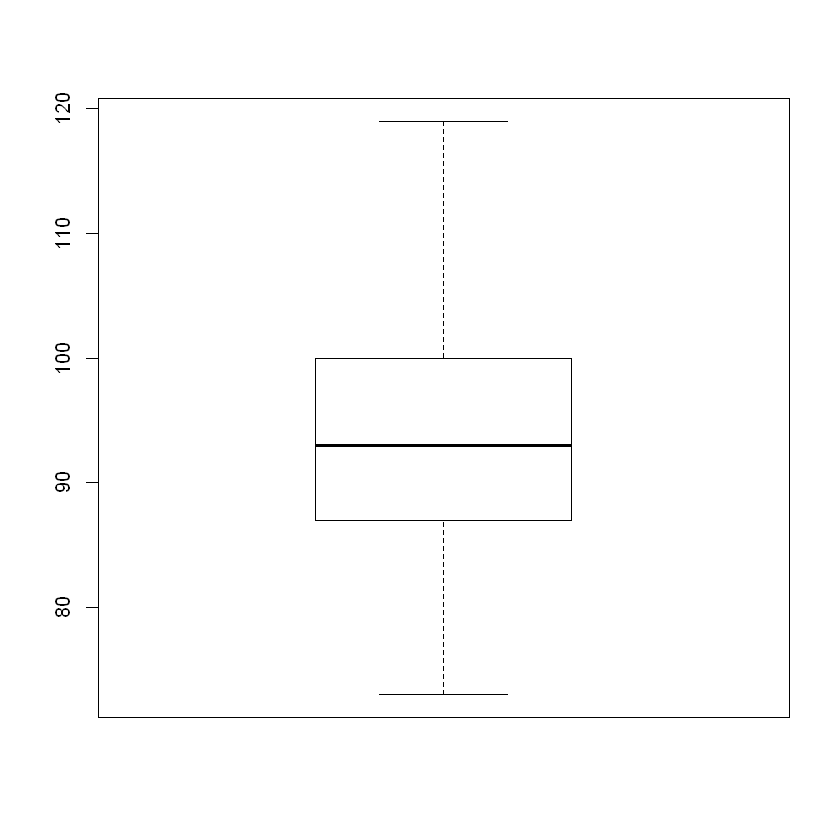

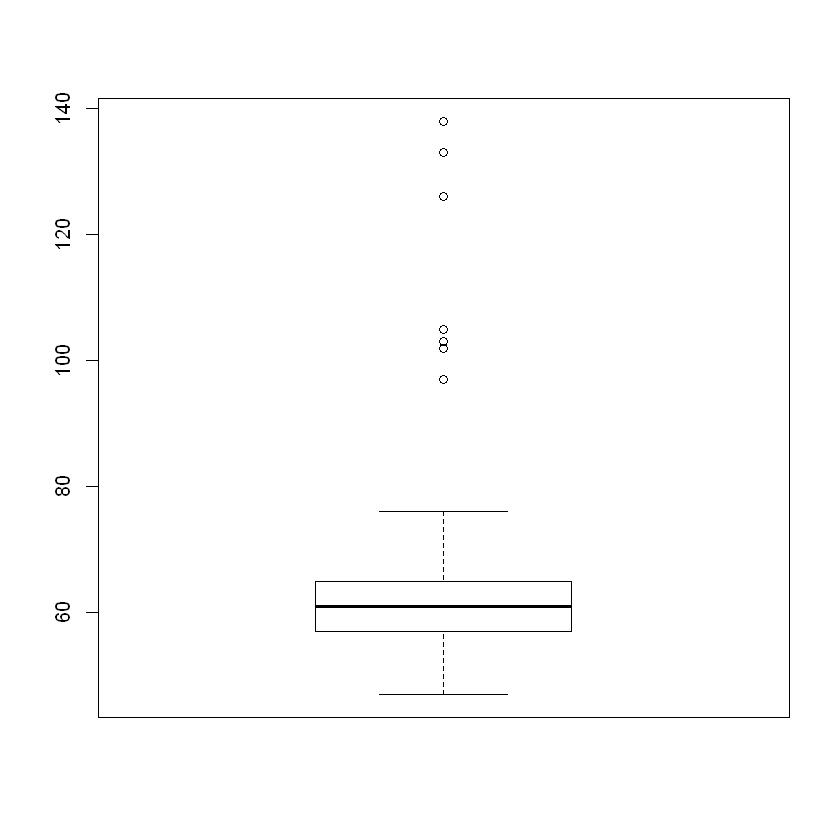

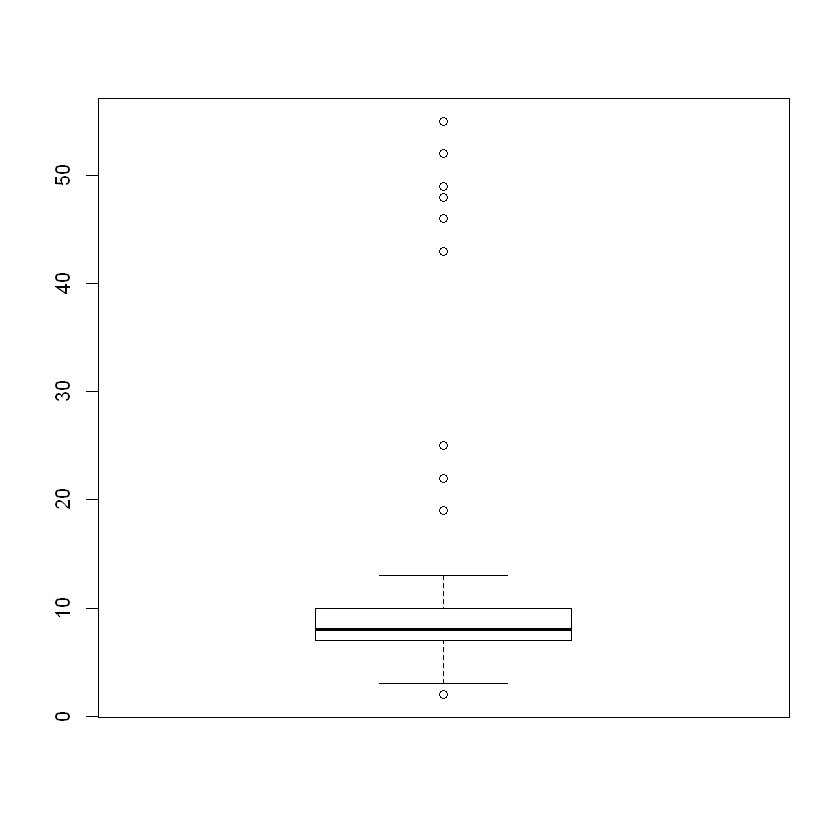

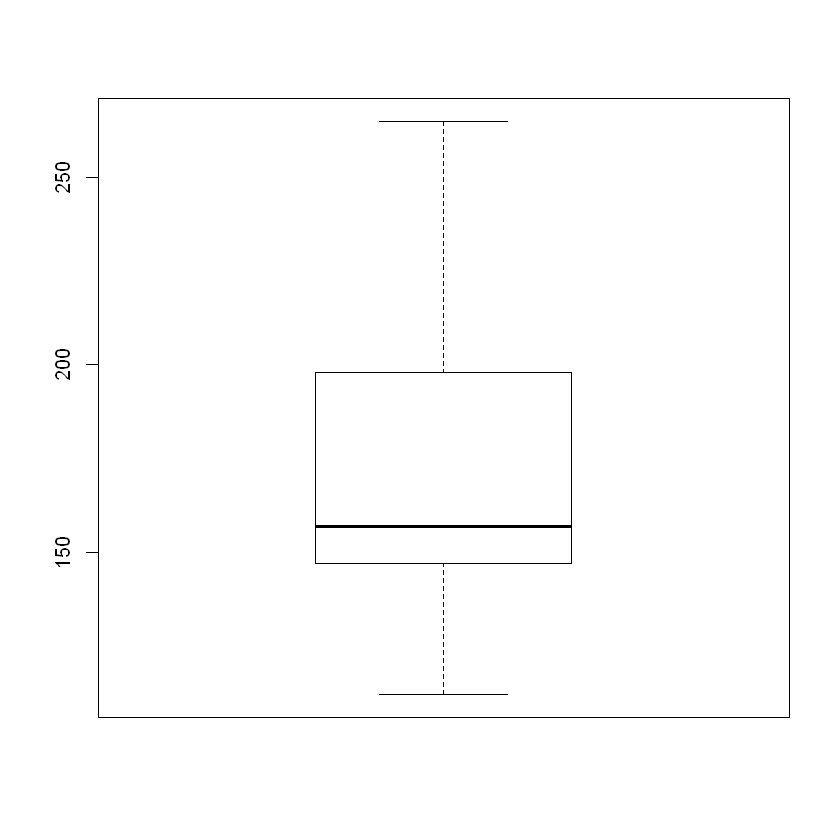

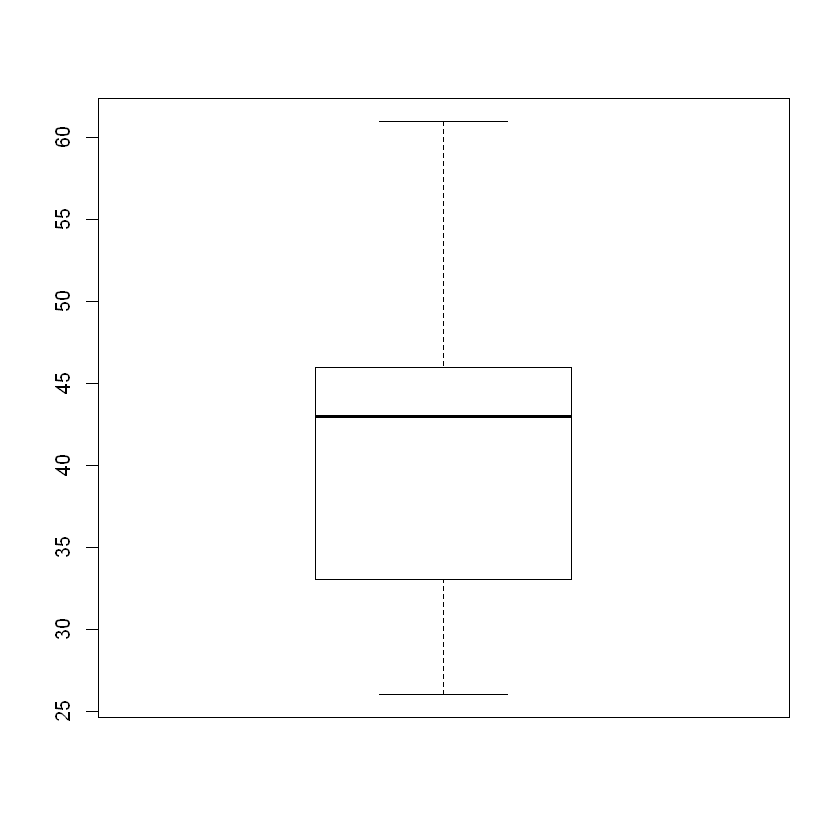

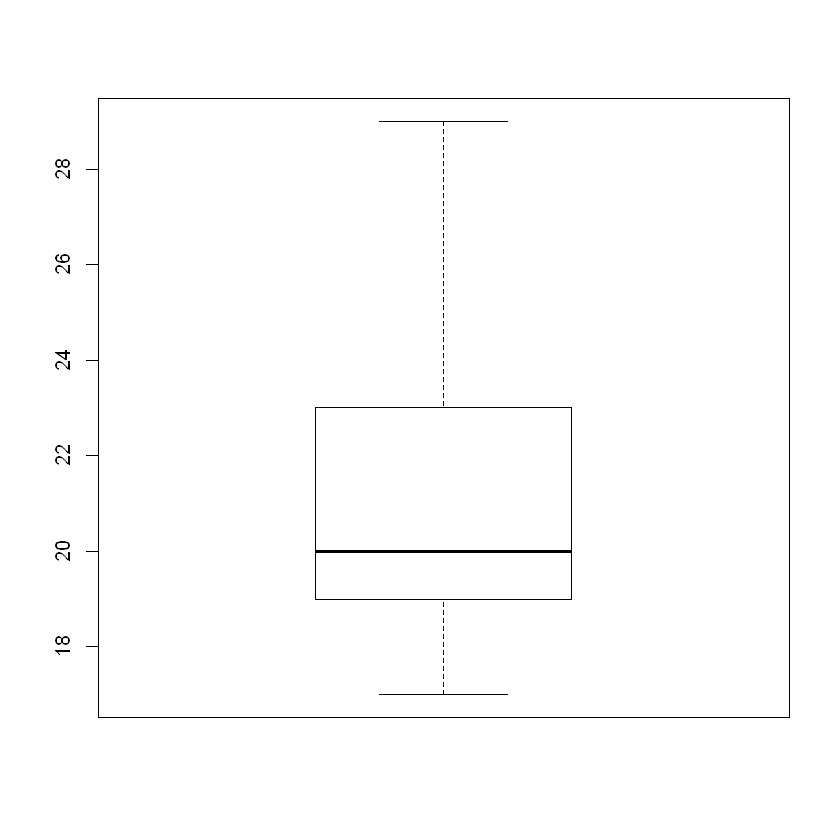

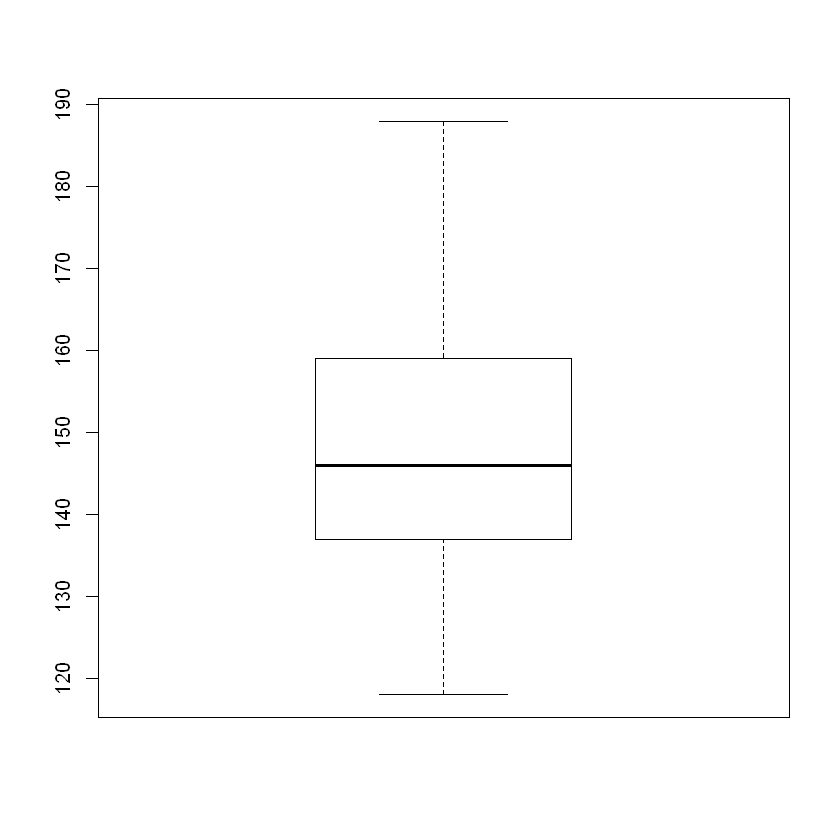

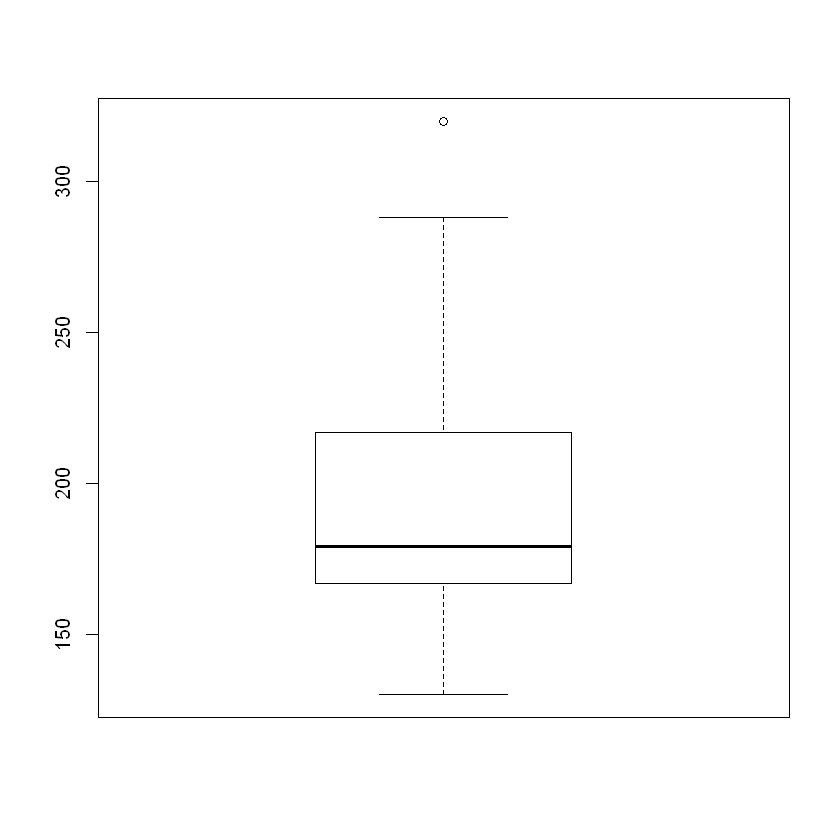

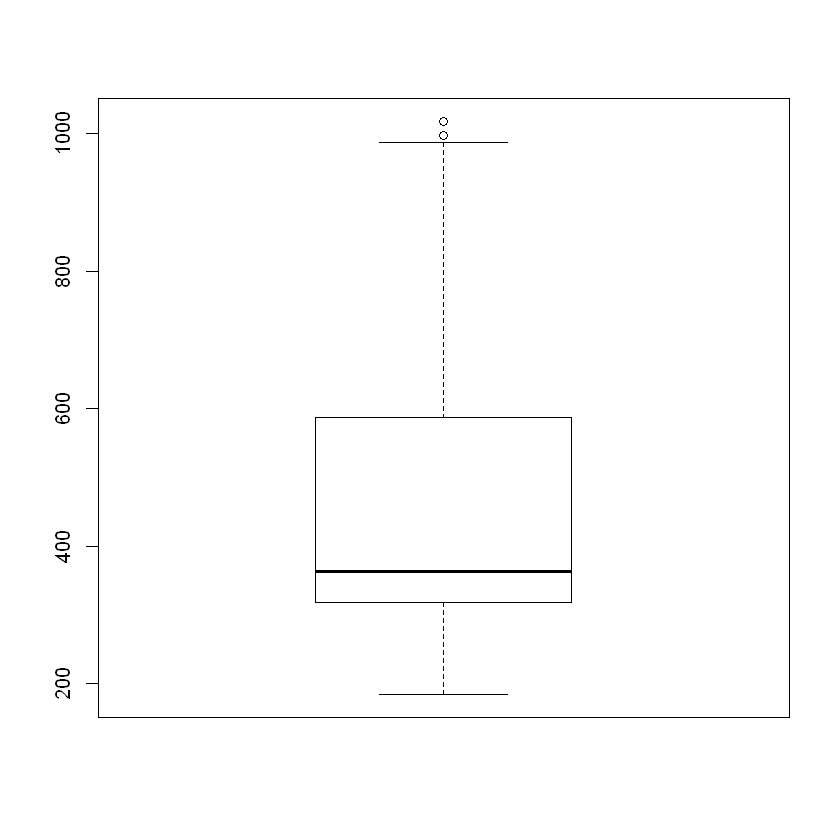

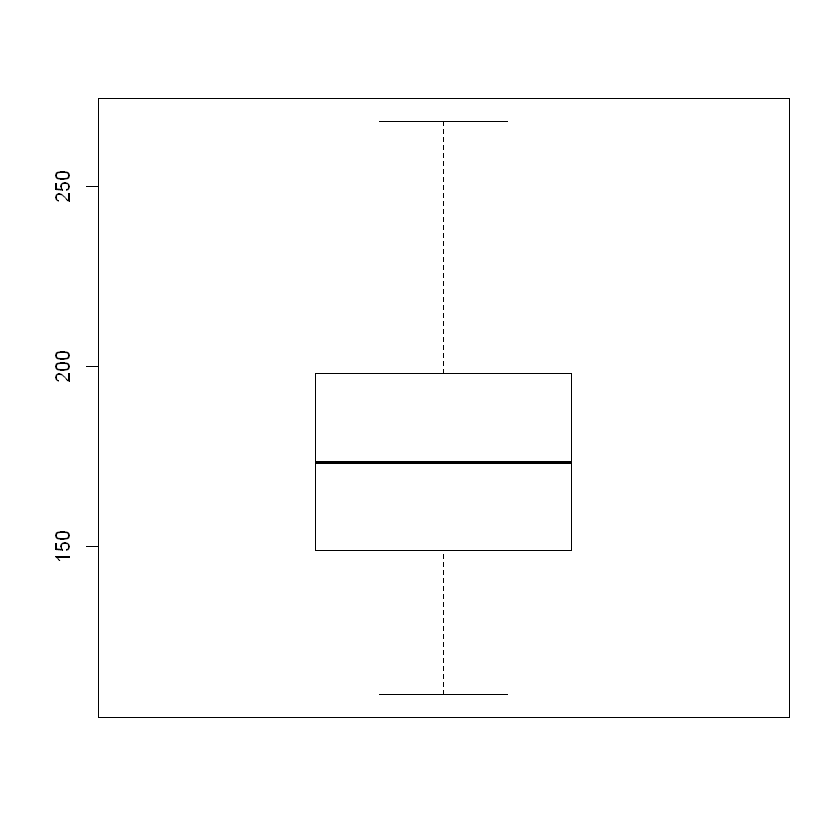

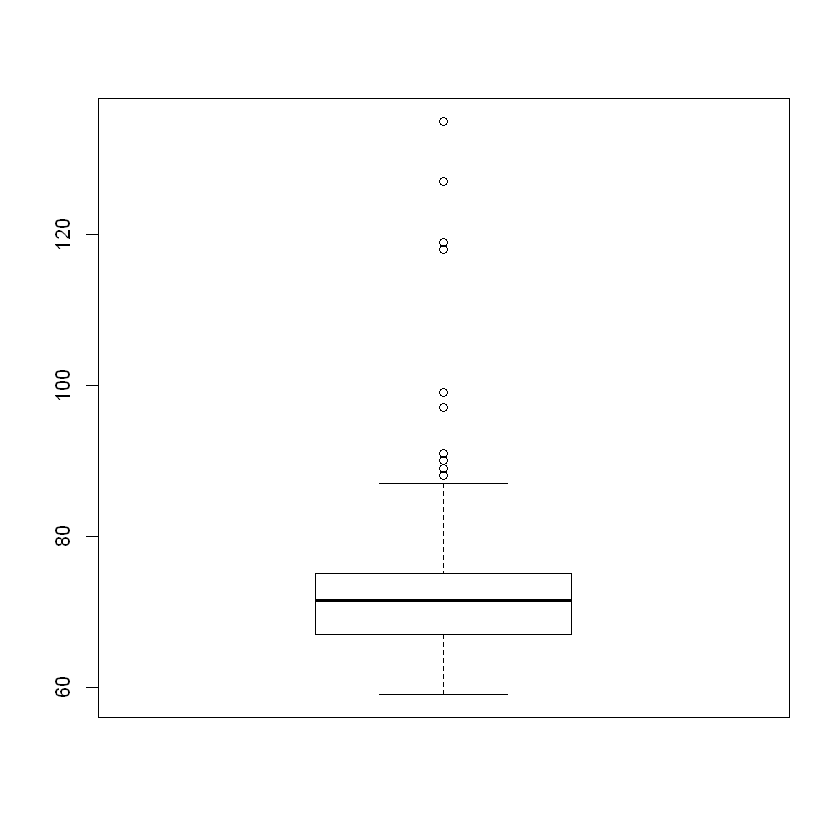

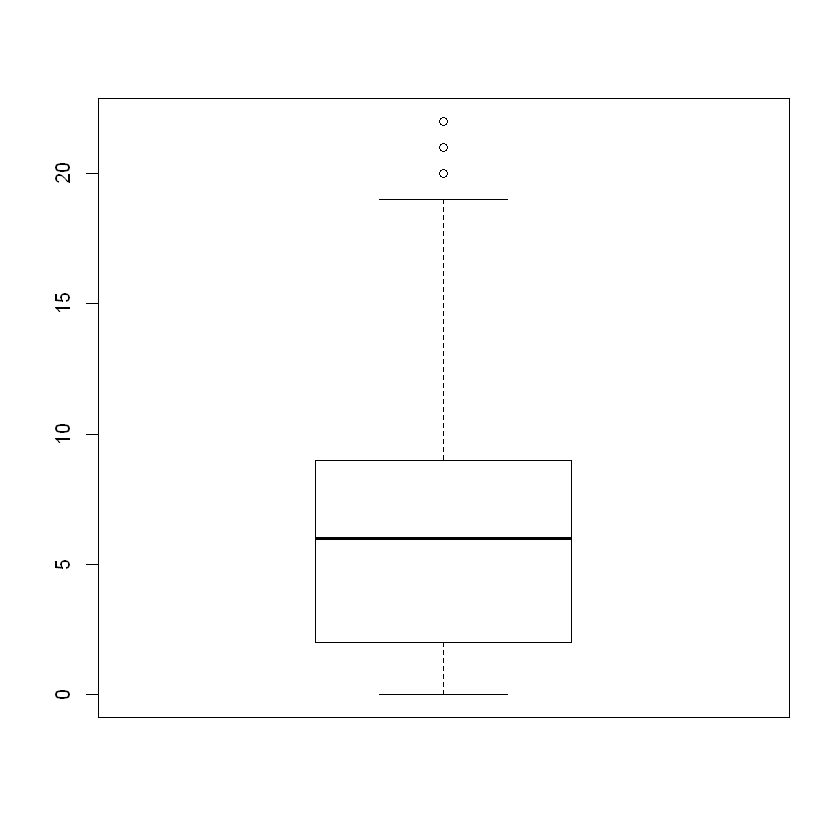

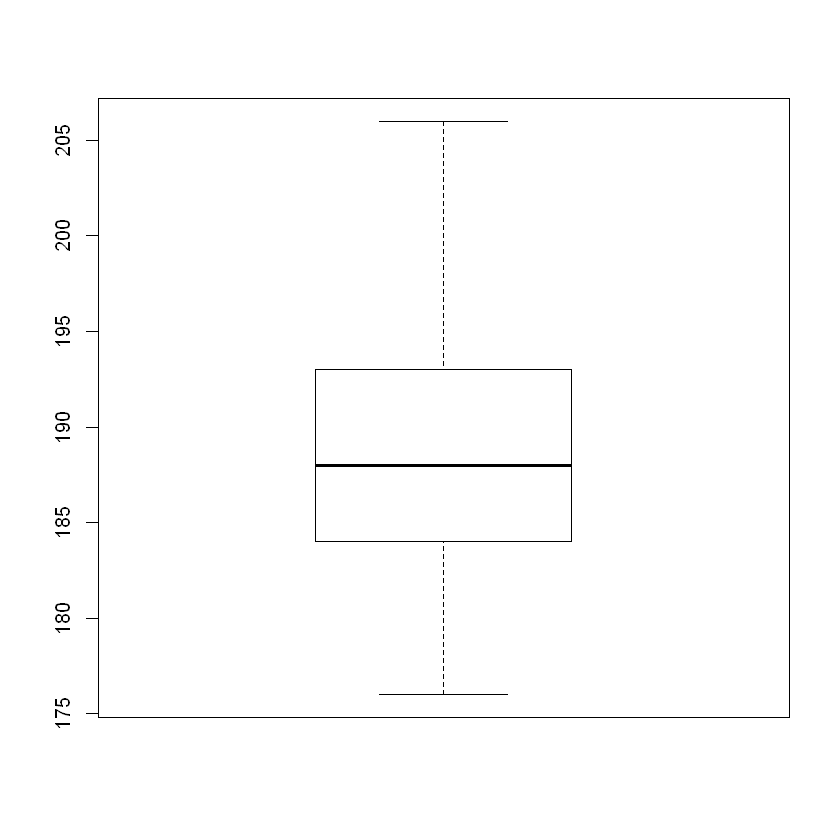

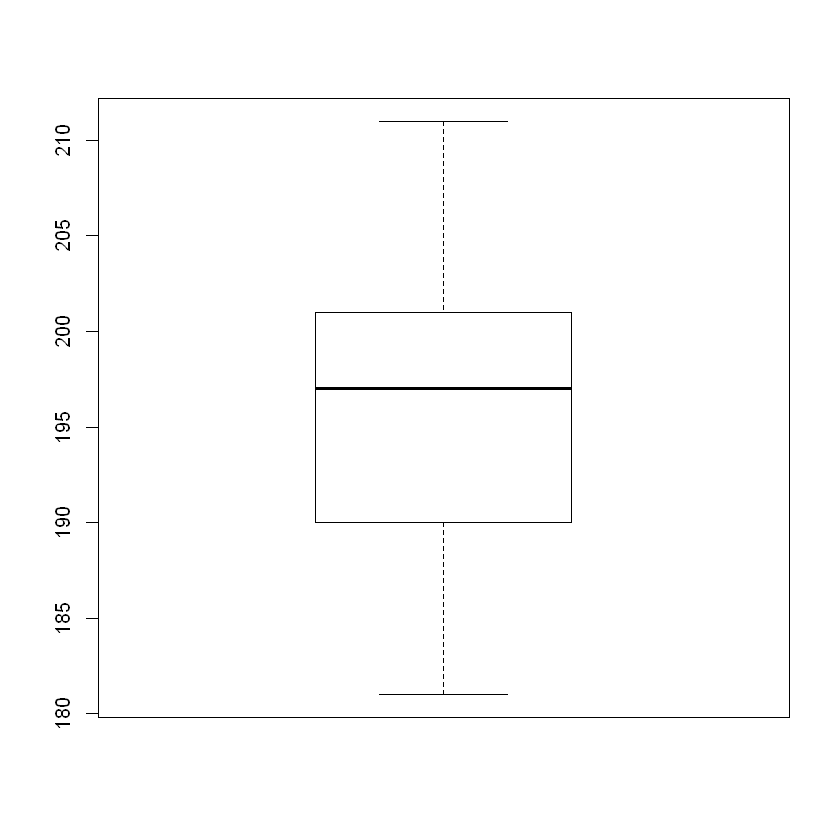

In [6]:
##the following is boxplot of all our attributes
boxplot(dataset$skewness_about.1)
boxplot(dataset$circularity)
boxplot(dataset$distance_circularity)
boxplot(dataset$radius_ratio)
boxplot(dataset$compactness)
boxplot(dataset$pr.axis_aspect_ratio)
boxplot(dataset$max.length_aspect_ratio)
boxplot(dataset$scatter_ratio)
boxplot(dataset$elongatedness)
boxplot(dataset$pr.axis_rectangularity)
boxplot(dataset$max.length_rectangularity)
boxplot(dataset$scaled_variance)
boxplot(dataset$scaled_variance.1)
boxplot(dataset$scaled_radius_of_gyration)
boxplot(dataset$scaled_radius_of_gyration.1)
boxplot(dataset$skewness_about)
boxplot(dataset$skewness_about.2)
boxplot(dataset$hollows_ratio)


<p>
Based on the boxplot analysis, it is evident that several columns in our dataset exhibit outliers. We will take care of these outliers during preprocessing stage.</p>

In [50]:
##lets look at some correlations and coveriance 
cov(dataset$compactness, dataset$hollows_ratio) 
cor(dataset$compactness, dataset$hollows_ratio) 

cov(dataset$max.length_aspect_ratio, dataset$hollows_ratio) 
cor(dataset$max.length_aspect_ratio, dataset$hollows_ratio)

[1] 22.39173

[1] 0.3655518

[1] 4.925981

[1] 0.1439187

<p>The is a correlation between compactness and hollows_ratio but a weak one, which means that we cant delete any of them.<br>There is a correlation as well in max length and hollows ratio but its also a weak correlation<br>Both pairs have a high coveriance</p>

<h4>Lets check if our data is balanced or not</h4>

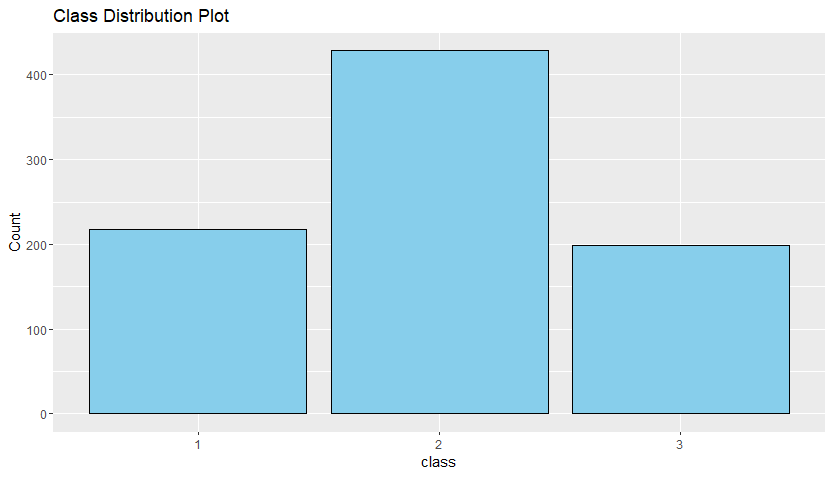

<p> </p>

<h3>During pre-processing</h3>

<h4>Balanacing Data</h4>

In [ ]:
dataset <- downSample(x = dataset[, -which(names(dataset) == "class")], y = dataset$class)

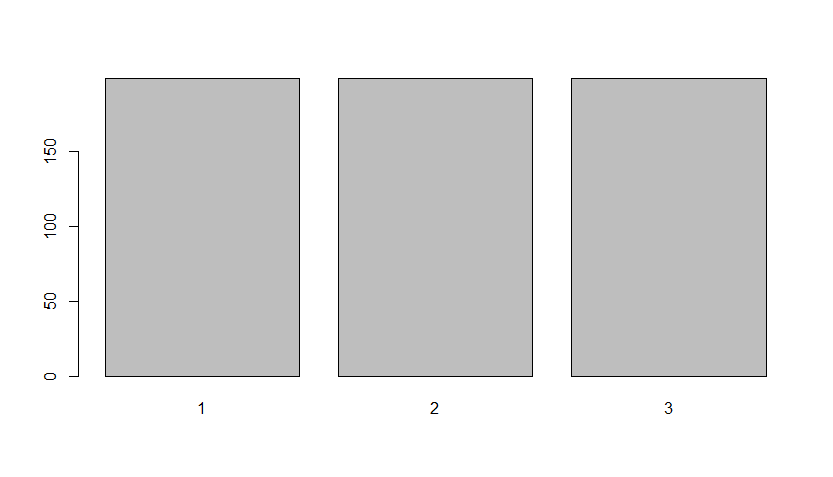

<p></p>

In [113]:
###Encoding categorical data
dataset$class = factor(dataset$class,levels = c("bus","car", "van"), labels = c(1, 2, 3))

In [114]:
##Dealing with  missing value
dataset$compactness[is.na(dataset$compactness)]<- (median(dataset$compactness, na.rm =TRUE))
dataset$circularity[is.na(dataset$circularity)]<- (median(dataset$circularity, na.rm =TRUE))
dataset$distance_circularity[is.na(dataset$distance_circularity)]<- (median(dataset$distance_circularity, na.rm =TRUE))
dataset$radius_ratio[is.na(dataset$radius_ratio)]<- (median(dataset$radius_ratio, na.rm =TRUE))
dataset$pr.axis_aspect_ratio[is.na(dataset$pr.axis_aspect_ratio)]<- (median(dataset$pr.axis_aspect_ratio, na.rm =TRUE))
dataset$max.length_aspect_ratio[is.na(dataset$max.length_aspect_ratio)]<- (median(dataset$max.length_aspect_ratio, na.rm =TRUE))
dataset$scatter_ratio[is.na(dataset$scatter_ratio)]<- (median(dataset$scatter_ratio, na.rm =TRUE))
dataset$elongatedness[is.na(dataset$elongatedness)]<- (median(dataset$elongatedness, na.rm =TRUE))
dataset$pr.axis_rectangularity[is.na(dataset$pr.axis_rectangularity)]<- (median(dataset$pr.axis_rectangularity, na.rm =TRUE))
dataset$max.length_rectangularity[is.na(dataset$max.length_rectangularity)]<- (median(dataset$max.length_rectangularity, na.rm =TRUE))
dataset$scaled_variance[is.na(dataset$scaled_variance)]<- (median(dataset$scaled_variance, na.rm =TRUE))
dataset$scaled_variance.1[is.na(dataset$scaled_variance.1)]<- (median(dataset$scaled_variance.1, na.rm =TRUE))
dataset$scaled_radius_of_gyration[is.na(dataset$scaled_radius_of_gyration)]<- (median(dataset$scaled_radius_of_gyration, na.rm =TRUE))
dataset$scaled_radius_of_gyration.1[is.na(dataset$scaled_radius_of_gyration.1)]<- (median(dataset$scaled_radius_of_gyration.1, na.rm =TRUE))
dataset$skewness_about[is.na(dataset$skewness_about)]<- (median(dataset$skewness_about, na.rm =TRUE))
dataset$skewness_about.1[is.na(dataset$skewness_about.1)]<- (median(dataset$skewness_about.1, na.rm =TRUE))
dataset$skewness_about.2[is.na(dataset$skewness_about.2)]<- (median(dataset$skewness_about.2, na.rm =TRUE))
dataset$hollows_ratio[is.na(dataset$hollows_ratio)]<- (median(dataset$hollows_ratio, na.rm =TRUE))



 <p>We have removed the missing values and set it as  median to ensures that we maintain the overall central tendency of the dataset, minimizing the potential distortion of the size-related information. </p>

In [115]:
## outliers analysis


##radius_ratio founded outliers 3

quartiles <- quantile(dataset$radius_ratio, probs=c(.25, .75), na.rm = FALSE)
IQR <- IQR(dataset$radius_ratio)

Lower <- quartiles[1] - 1.5*IQR
Upper <- quartiles[2] + 1.5*IQR 

data_no_outlier <- subset(dataset, dataset$radius_ratio > Lower & dataset$radius_ratio < Upper)
dim(data_no_outlier)


##pr.axis_aspect_ratio outliers 8

quartiles <- quantile(dataset$pr.axis_aspect_ratio, probs=c(.25, .75), na.rm = FALSE)
IQR <- IQR(dataset$pr.axis_aspect_ratio)

Lower <- quartiles[1] - 1.5*IQR
Upper <- quartiles[2] + 1.5*IQR 

data_no_outlier <- subset(dataset, dataset$pr.axis_aspect_ratio > Lower & dataset$pr.axis_aspect_ratio < Upper)
dim(data_no_outlier)


##max.length_aspect_ratio outliers is 5

quartiles <- quantile(dataset$max.length_aspect_ratio, probs=c(.25, .75), na.rm = FALSE)
IQR <- IQR(dataset$max.length_aspect_ratio)

Lower <- quartiles[1] - 1.5*IQR
Upper <- quartiles[2] + 1.5*IQR 

data_no_outlier <- subset(dataset, dataset$max.length_aspect_ratio > Lower & dataset$max.length_aspect_ratio < Upper)
dim(data_no_outlier)



##scaled_variance outliers is 1

quartiles <- quantile(dataset$scaled_variance, probs=c(.25, .75), na.rm = FALSE)
IQR <- IQR(dataset$scaled_variance)

Lower <- quartiles[1] - 1.5*IQR
Upper <- quartiles[2] + 1.5*IQR 

data_no_outlier <- subset(dataset, dataset$scaled_variance > Lower & dataset$scaled_variance < Upper)
dim(data_no_outlier)



##scaled_variance.1 outliers is 2

quartiles <- quantile(dataset$scaled_variance.1, probs=c(.25, .75), na.rm = FALSE)
IQR <- IQR(dataset$scaled_variance.1)

Lower <- quartiles[1] - 1.5*IQR
Upper <- quartiles[2] + 1.5*IQR 

data_no_outlier <- subset(dataset, dataset$scaled_variance.1 > Lower & dataset$scaled_variance.1 < Upper)
dim(data_no_outlier)



##scaled_radius_of_gyration.1 is outliers is 10

quartiles <- quantile(dataset$scaled_radius_of_gyration.1, probs=c(.25, .75), na.rm = FALSE)
IQR <- IQR(dataset$scaled_variance.1)

Lower <- quartiles[1] - 1.5*IQR
Upper <- quartiles[2] + 1.5*IQR 

data_no_outlier <- subset(dataset, dataset$scaled_radius_of_gyration.1 > Lower & dataset$scaled_radius_of_gyration.1 < Upper)
dim(data_no_outlier)


##skewness_about is outliers is 3

quartiles <- quantile(dataset$skewness_about, probs=c(.25, .75), na.rm = FALSE)
IQR <- IQR(dataset$skewness_about)

Lower <- quartiles[1] - 1.5*IQR
Upper <- quartiles[2] + 1.5*IQR 

data_no_outlier <- subset(dataset, dataset$skewness_about > Lower & dataset$skewness_about < Upper)
dim(data_no_outlier)


##skewness_about.1 is outliers is 3

quartiles <- quantile(dataset$skewness_about.1, probs=c(.25, .75), na.rm = FALSE)
IQR <- IQR(dataset$skewness_about.1)

Lower <- quartiles[1] - 1.5*IQR
Upper <- quartiles[2] + 1.5*IQR 

data_no_outlier <- subset(dataset, dataset$skewness_about.1 > Lower & dataset$skewness_about.1 < Upper)
dim(data_no_outlier)


[1] 843  19

[1] 838  19

[1] 833  19

[1] 845  19

[1] 844  19

[1] 846  19

[1] 834  19

[1] 844  19

In [116]:
##feature selection
cor(dataset[, unlist(lapply(dataset, is.numeric))]) 
dataset<- subset(dataset, select = -pr.axis_rectangularity)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.00000000,0.68488735,0.7899282,0.68974326,0.09153433,0.14824919,0.812620455,-0.78874979,0.81369363,0.676143173,0.76207048,0.814012331,0.58524258,-0.24959256,0.23607838,0.157014624,0.298537045,0.36555185
circularity,0.68488735,1.00000000,0.7923199,0.62091189,0.15377824,0.25146678,0.847937623,-0.82147171,0.84339992,0.961318065,0.79630600,0.835945794,0.92581602,0.05194638,0.14419763,-0.011438582,-0.104426464,0.04635077
distance_circularity,0.78992816,0.79231986,1.0000000,0.76703473,0.15845567,0.26468634,0.905075773,-0.91130693,0.89302514,0.774527311,0.86151949,0.886017233,0.70577140,-0.22594376,0.11392408,0.265546620,0.146098232,0.33273248
radius_ratio,0.68974326,0.62091189,0.7670347,1.00000000,0.66344728,0.45005165,0.734429014,-0.78948132,0.70838538,0.568949244,0.79341476,0.718435955,0.53637202,-0.18039735,0.04871268,0.173740880,0.382213900,0.47130883
pr.axis_aspect_ratio,0.09153433,0.15377824,0.1584557,0.66344728,1.00000000,0.64872367,0.103731961,-0.18303495,0.07960366,0.126909207,0.27291009,0.089188722,0.12197089,0.15294990,-0.05837060,-0.031976063,0.239885789,0.26772524
max.length_aspect_ratio,0.14824919,0.25146678,0.2646863,0.45005165,0.64872367,1.00000000,0.166191195,-0.18014007,0.16150200,0.305942689,0.31895682,0.143253165,0.18974277,0.29573465,0.01559923,0.043421852,-0.026080611,0.14391873
scatter_ratio,0.81262046,0.84793762,0.9050758,0.73442901,0.10373196,0.16619119,1.000000000,-0.97160086,0.98975051,0.809083347,0.94866231,0.993011536,0.79987452,-0.02754187,0.07445766,0.212428193,0.005627729,0.11881749
elongatedness,-0.78874979,-0.82147171,-0.9113069,-0.78948132,-0.18303495,-0.18014007,-0.971600864,1.00000000,-0.94899586,-0.775853691,-0.93638184,-0.953816095,-0.76631386,0.10330203,-0.05259968,-0.185053440,-0.115125887,-0.21690481
pr.axis_rectangularity,0.81369363,0.84339992,0.8930251,0.70838538,0.07960366,0.16150200,0.989750510,-0.94899586,1.00000000,0.810933583,0.93422702,0.988213155,0.79668965,-0.01549538,0.08376715,0.214700454,-0.018648572,0.09928622
max.length_rectangularity,0.67614317,0.96131807,0.7745273,0.56894924,0.12690921,0.30594269,0.809083347,-0.77585369,0.81093358,1.000000000,0.74498464,0.794614544,0.86645041,0.04162173,0.13585154,0.001365657,-0.103947748,0.07676962



<p>We found that pr.axis_rectangularity in our dataset that is strongly correlated with multiple other columns, it indicates multicollinearity, where features are closely related, making model building challenging. In such cases, feature selection is vital, involving the careful choice of relevant and independent features while reducing redundancy.</p>


In [117]:
##normalization
normalize <- function(x) {return((x-min(x))/ (max(x)-min(x)))}
dataset$scaled_variance.1 <-normalize(dataset$scaled_variance.1)


<p>Using normalization on Scaled_variance.1 means adjusting its values to a similar scale as other columns in the dataset to prevent one column from dominating the analysis or modeling process.However we did not normalize the rest of our columns since the range provided is already considered a small one.</p>

<h5>Discretization</h5>
<p>Since our dataset is mainly size related variables its best to retain them as continuous variable without discretization. </p>

<h3>After pre-processing</h3>



In [10]:
##Data before preprocessing
head(databeforereprossess)


compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,car
93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
107,NA,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus


In [89]:
##Lets take a look at our dataset after preprocessing
head(dataset)

compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
95,48,83,178,72,10,162,42,159,176,0.2338129,184,70,6,16,187,197,3
91,41,84,141,57,9,149,45,143,170,0.1750600,158,72,9,14,189,199,3
104,50,106,209,66,10,207,32,158,223,0.5407674,220,73,14,9,188,196,2
93,41,82,159,63,9,144,46,143,160,0.1498801,127,63,6,10,199,207,3
85,44,70,205,103,52,149,45,144,241,0.1690647,188,127,9,11,180,183,1
107,44,106,172,50,6,255,26,169,280,0.9268585,264,85,5,9,181,183,1


<p>In conclusion, our initial examination of the dataset involved several key steps. We began by identifying the attributes contained within the dataset, providing us with an understanding of the types of data we are working with. We gathered general information about the dataset and added some visualizations  to provide a clearer and more intuitive understanding of the data.Then lastly we began the preprocessing stage, a critical phase , where we  made only the necessary adjustments required to prepare the dataset for more advanced analyses. This ensured that our data was clean and reliable.</p>

<h1>Data mining techniques</h1>

<h2>1.Classification</h2>

<h3>1.1:Information Gain</h3>

<h4>1.1.A:split on 70% training and 30%testing</h4>

<h6>First we split dataset into training and testing subnets</h6>


In [1]:
##Needed library
library(party)
library(e1071)
library(caret)

ERROR: Error in library(party): there is no package called 'party'


In [ ]:
# 1. Split the dataset into training and testing subsets
ind <- sample(2, nrow(dataset), replace = TRUE, prob = c(0.7, 0.3))
train.data <- dataset[ind == 1, ]
test.data <- dataset[ind == 2, ]

In [ ]:
# 2. Define the formula for the model
myFormula <- Class ~ scaled_variance + skewness_about.2 + scatter_ratio + elongatedness

In [ ]:
# 3. Build the decision tree using the training set
dataset.ctree <- ctree(myFormula, data = train.data)

In [ ]:
# 4. Check the prediction on the training set
trainPred <- predict(dataset.ctree)
table(trainPred, train.data$Class)

<pre>trainPred   1   2   3
        1 123  33  29
        2  13  97  15
        3   5  12  86</pre>

In [ ]:
# 5.Print and plot the tree:

print(dataset.ctree)
plot(dataset.ctree, type="simple")

<pre>Conditional inference tree with 11 terminal nodes

Response:  Class 
Inputs:  scaled_variance, skewness_about.2, scatter_ratio, elongatedness 
Number of observations:  413 

1) elongatedness <= 41; criterion = 1, statistic = 113.277
  2) skewness_about.2 <= 194; criterion = 0.992, statistic = 9.468
    3) scaled_variance <= 235; criterion = 1, statistic = 34.25
      4) skewness_about.2 <= 190; criterion = 1, statistic = 16.141
        5)*  weights = 59 
      4) skewness_about.2 > 190
        6)*  weights = 35 
    3) scaled_variance > 235
      7)*  weights = 18 
  2) skewness_about.2 > 194
    8)*  weights = 41 
1) elongatedness > 41
  9) elongatedness <= 46; criterion = 1, statistic = 28.379
    10) scatter_ratio <= 154; criterion = 1, statistic = 29.31
      11) skewness_about.2 <= 184; criterion = 1, statistic = 22.845
        12) skewness_about.2 <= 182; criterion = 0.981, statistic = 7.992
          13)*  weights = 46 
        12) skewness_about.2 > 182
          14)*  weights = 8 
      11) skewness_about.2 > 184
        15)*  weights = 72 
    10) scatter_ratio > 154
      16) skewness_about.2 <= 189; criterion = 0.999, statistic = 15.796
        17)*  weights = 35 
      16) skewness_about.2 > 189
        18)*  weights = 12 
  9) elongatedness > 46
    19) skewness_about.2 <= 185; criterion = 0.971, statistic = 9.846
      20)*  weights = 31 
    19) skewness_about.2 > 185
      21)*  weights = 56 </pre>

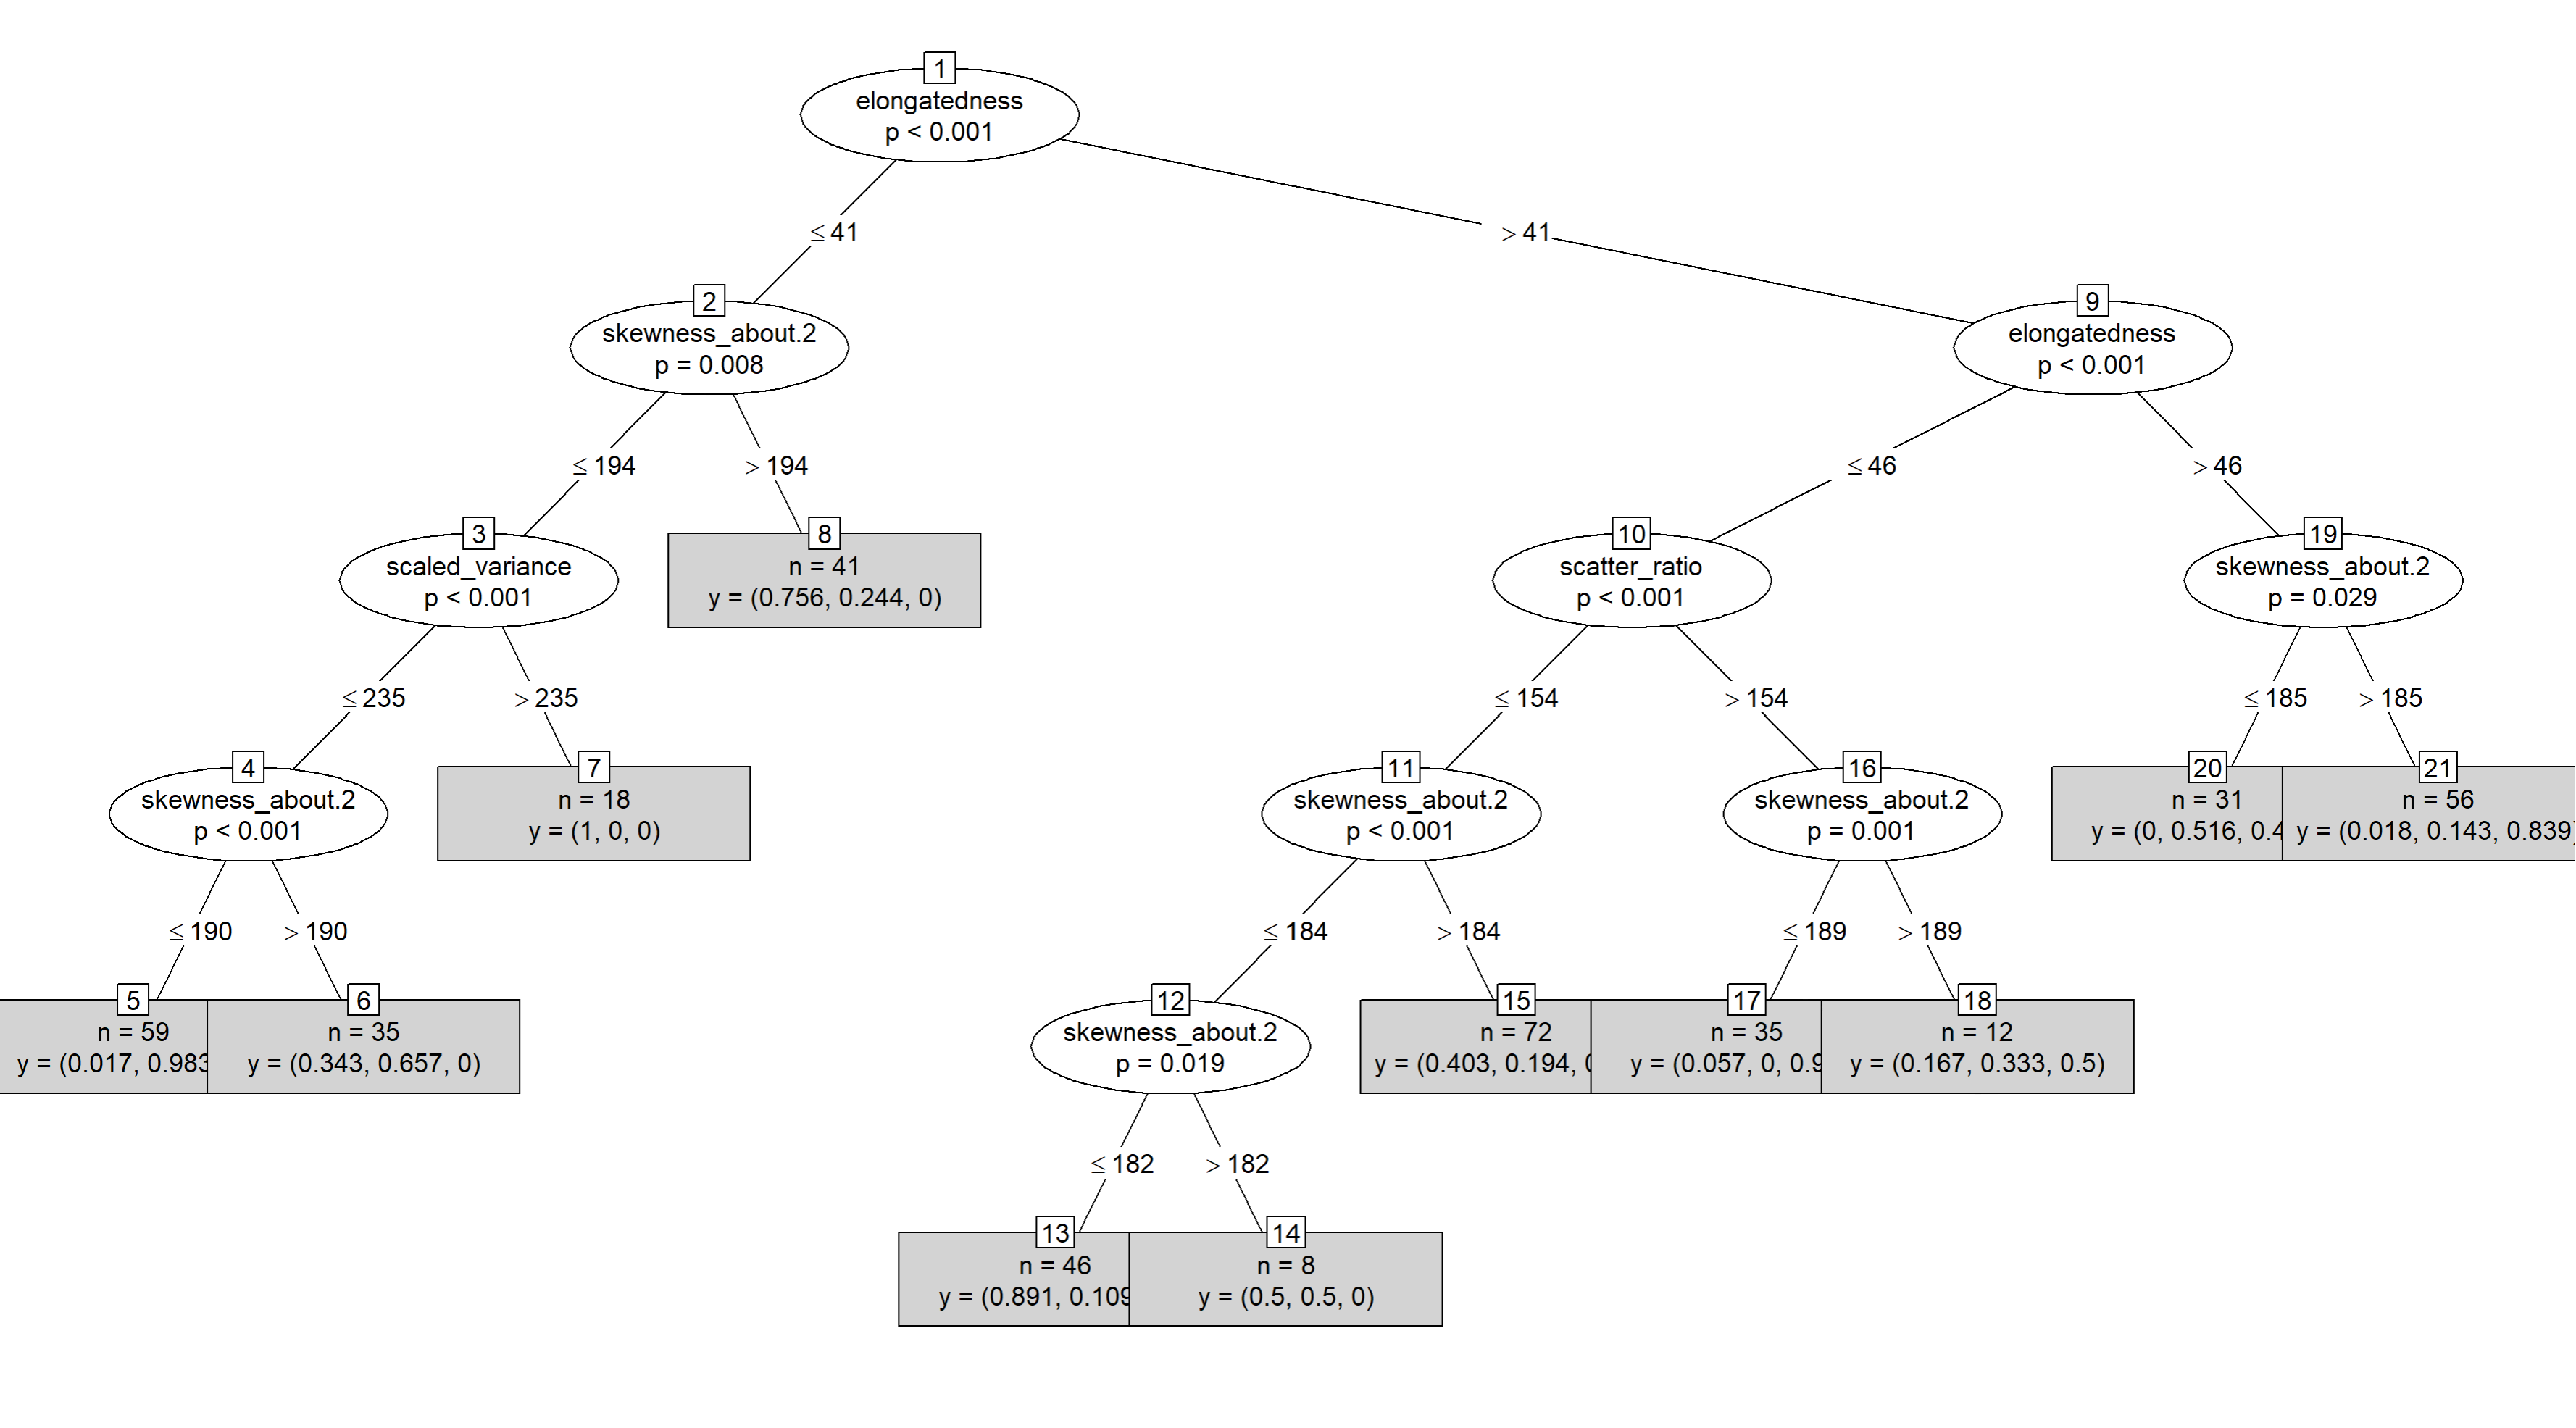

In [ ]:
# 6. Use the model to predict the class labels of the test data
testPred <- predict(dataset.ctree, newdata = test.data)
result <- table(testPred, test.data$Class)

In [ ]:
# 6. Evaluate the model


co_result <- confusionMatrix(result)
print(co_result)


# Extracting sensitivity and specificity from the table in co_result
table_matrix <- co_result$table

# Extracting true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)
TP <- table_matrix[2, 2]  # True Positive
TN <- sum(diag(table_matrix)) - sum(table_matrix[2, ]) - sum(table_matrix[, 2]) + TP  # True Negative
FP <- sum(table_matrix[, 2]) - TP  # False Positive
FN <- sum(table_matrix[2, ]) - TP  # False Negative

# Calculate sensitivity and specificity
sensitivity <- TP / (TP + FN)
specificity <- TN / (TN + FP)

# Print the sensitivity and specificity
print(sensitivity)
print(specificity)




accuracy <- co_result$overall["Accuracy"]
accuracy


<pre>Confusion Matrix and Statistics

        
testPred  1  2  3
       1 55 18 10
       2  3 31 13
       3  0  8 46

Overall Statistics
                                          
               Accuracy : 0.7174          
                 95% CI : (0.6465, 0.7812)
    No Information Rate : 0.375           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5773          
                                          
 Mcnemar's Test P-Value : 6.828e-05       

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9483   0.5439   0.6667
Specificity            0.7778   0.8740   0.9304
Pos Pred Value         0.6627   0.6596   0.8519
Neg Pred Value         0.9703   0.8102   0.8231
Prevalence             0.3152   0.3098   0.3750
Detection Rate         0.2989   0.1685   0.2500
Detection Prevalence   0.4511   0.2554   0.2935
Balanced Accuracy      0.8630   0.7089   0.7986

        </pre>

In [ ]:
 print(sensitivity)
[1] 0.6595745
> print(specificity)
[1] 0.6941176

In [ ]:
 Accuracy 
0.7173913 

<h4>1.1.B:split on 80% training and 20%testing</h4>

In [ ]:
# 1. Split the dataset into training and testing subsets
ind <- sample(2, nrow(dataset), replace = TRUE, prob = c(0.8, 0.2))
train.data <- dataset[ind == 1, ]
test.data <- dataset[ind == 2, ]

In [ ]:
# 2. Define the formula for the model
myFormula <- Class ~ scaled_variance + skewness_about.2 + scatter_ratio + elongatedness

In [ ]:
# 3. Build the decision tree using the training set
dataset.ctree <- ctree(myFormula, data = train.data)

In [ ]:
# 4. Check the prediction on the training set
trainPred <- predict(dataset.ctree)
table(trainPred, train.data$Class)

<pre>trainPred   1   2   3
        1  82  17  30
        2  72 110   3
        3   2  27 126</pre>

In [ ]:
# 5.Print and plot the tree:
print(dataset.ctree)
plot(dataset.ctree, type="simple")

<pre>Conditional inference tree with 6 terminal nodes

Response:  Class 
Inputs:  scaled_variance, skewness_about.2, scatter_ratio, elongatedness 
Number of observations:  469 

1) elongatedness <= 42; criterion = 1, statistic = 149.985
  2)*  weights = 185 
1) elongatedness > 42
  3) elongatedness <= 46; criterion = 1, statistic = 39.885
    4) scatter_ratio <= 154; criterion = 1, statistic = 34.438
      5) skewness_about.2 <= 182; criterion = 1, statistic = 23.226
        6)*  weights = 45 
      5) skewness_about.2 > 182
        7)*  weights = 84 
    4) scatter_ratio > 154
      8)*  weights = 44 
  3) elongatedness > 46
    9) skewness_about.2 <= 188; criterion = 0.963, statistic = 9.325
      10)*  weights = 55 
    9) skewness_about.2 > 188
      11)*  weights = 56 </pre>

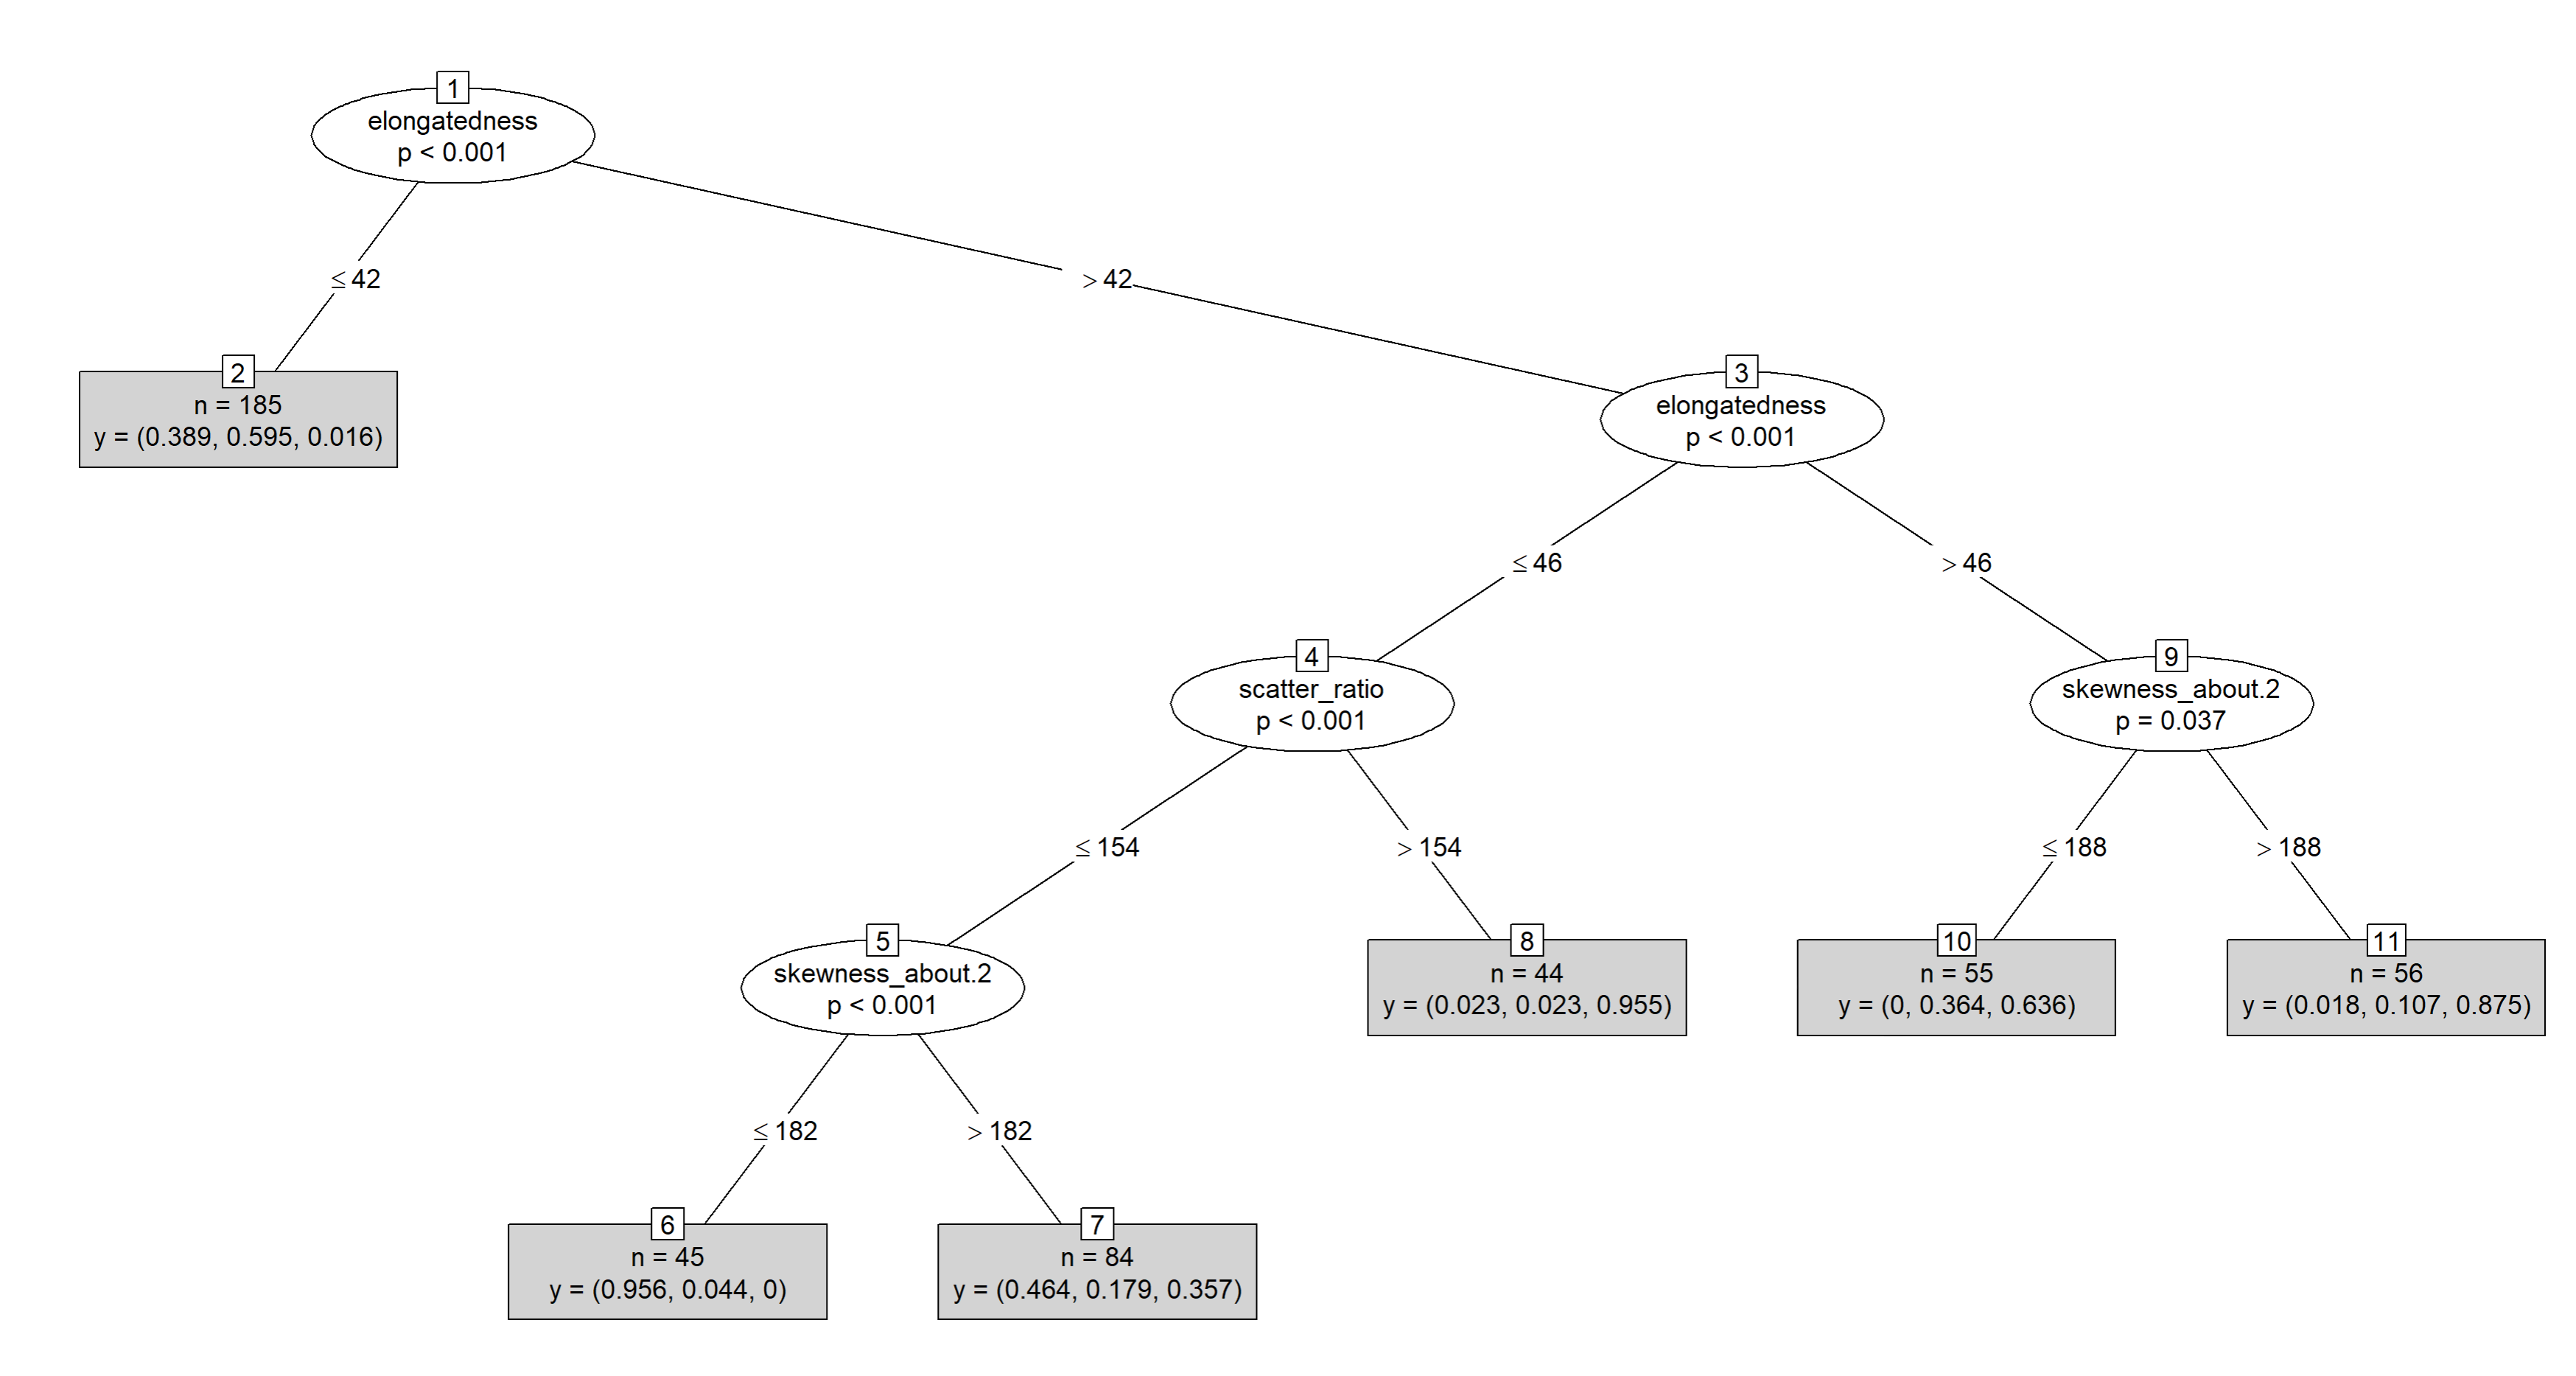

In [ ]:
# 6. Use the model to predict the class labels of the test data
testPred <- predict(dataset.ctree, newdata = test.data)
result <- table(testPred, test.data$Class)

In [ ]:
# 7. Evaluate the model
co_result <- confusionMatrix(result)
print(co_result)


# Extracting sensitivity and specificity from the table in co_result
table_matrix <- co_result$table

# Extracting true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)
TP <- table_matrix[2, 2]  # True Positive
TN <- sum(diag(table_matrix)) - sum(table_matrix[2, ]) - sum(table_matrix[, 2]) + TP  # True Negative
FP <- sum(table_matrix[, 2]) - TP  # False Positive
FN <- sum(table_matrix[2, ]) - TP  # False Negative

# Calculate sensitivity and specificity
sensitivity <- TP / (TP + FN)
specificity <- TN / (TN + FP)

# Print the sensitivity and specificity
print(sensitivity)
print(specificity)




accuracy <- co_result$overall["Accuracy"]
accuracy

<pre>Confusion Matrix and Statistics

        
testPred  1  2  3
       1 27  5  9
       2 16 36  3
       3  0  4 28

Overall Statistics
                                          
               Accuracy : 0.7109          
                 95% CI : (0.6242, 0.7876)
    No Information Rate : 0.3516          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.5641          
                                          
 Mcnemar's Test P-Value : 0.0019          

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.6279   0.8000   0.7000
Specificity            0.8353   0.7711   0.9545
Pos Pred Value         0.6585   0.6545   0.8750
Neg Pred Value         0.8161   0.8767   0.8750
Prevalence             0.3359   0.3516   0.3125
Detection Rate         0.2109   0.2812   0.2188
Detection Prevalence   0.3203   0.4297   0.2500
Balanced Accuracy      0.7316   0.7855   0.8273 
        </pre>

In [ ]:
 print(sensitivity)
[1] 0.6545455
> print(specificity)
[1] 0.75

In [ ]:
Accuracy 
0.7109375 

<h4>1.1.C:split on 60% training and 40%testing</h4>

In [ ]:
# 1. Split the dataset into training and testing subsets
ind <- sample(2, nrow(dataset), replace = TRUE, prob = c(0.6, 0.4))
train.data <- dataset[ind == 1, ]
test.data <- dataset[ind == 2, ]

In [ ]:
# 2. Define the formula for the model
myFormula <- Class ~ scaled_variance + skewness_about.2 + scatter_ratio 

In [ ]:
# 3. Build the decision tree using the training set
dataset.ctree <- ctree(myFormula, data = train.data)

In [ ]:
# 4. Check the prediction on the training set
trainPred <- predict(dataset.ctree)
table(trainPred, train.data$Class)

<pre>trainPred   1   2   3
        1 127  46  66
        2   0  54   0
        3   0  21  55
        </pre>

In [ ]:
# 5.Print and plot the tree:
print(dataset.ctree)
plot(dataset.ctree, type="simple")

<pre>Conditional inference tree with 5 terminal nodes

Response:  Class 
Inputs:  scaled_variance, skewness_about.2, scatter_ratio 
Number of observations:  369 

1) scatter_ratio <= 173; criterion = 1, statistic = 96.371
  2) scatter_ratio <= 142; criterion = 1, statistic = 31.679
    3)*  weights = 76 
  2) scatter_ratio > 142
    4)*  weights = 192 
1) scatter_ratio > 173
  5) scaled_variance <= 241; criterion = 0.993, statistic = 9.309
    6) skewness_about.2 <= 191; criterion = 1, statistic = 23.46
      7)*  weights = 54 
    6) skewness_about.2 > 191
      8)*  weights = 35 
  5) scaled_variance > 241
    9)*  weights = 12 
    </pre>

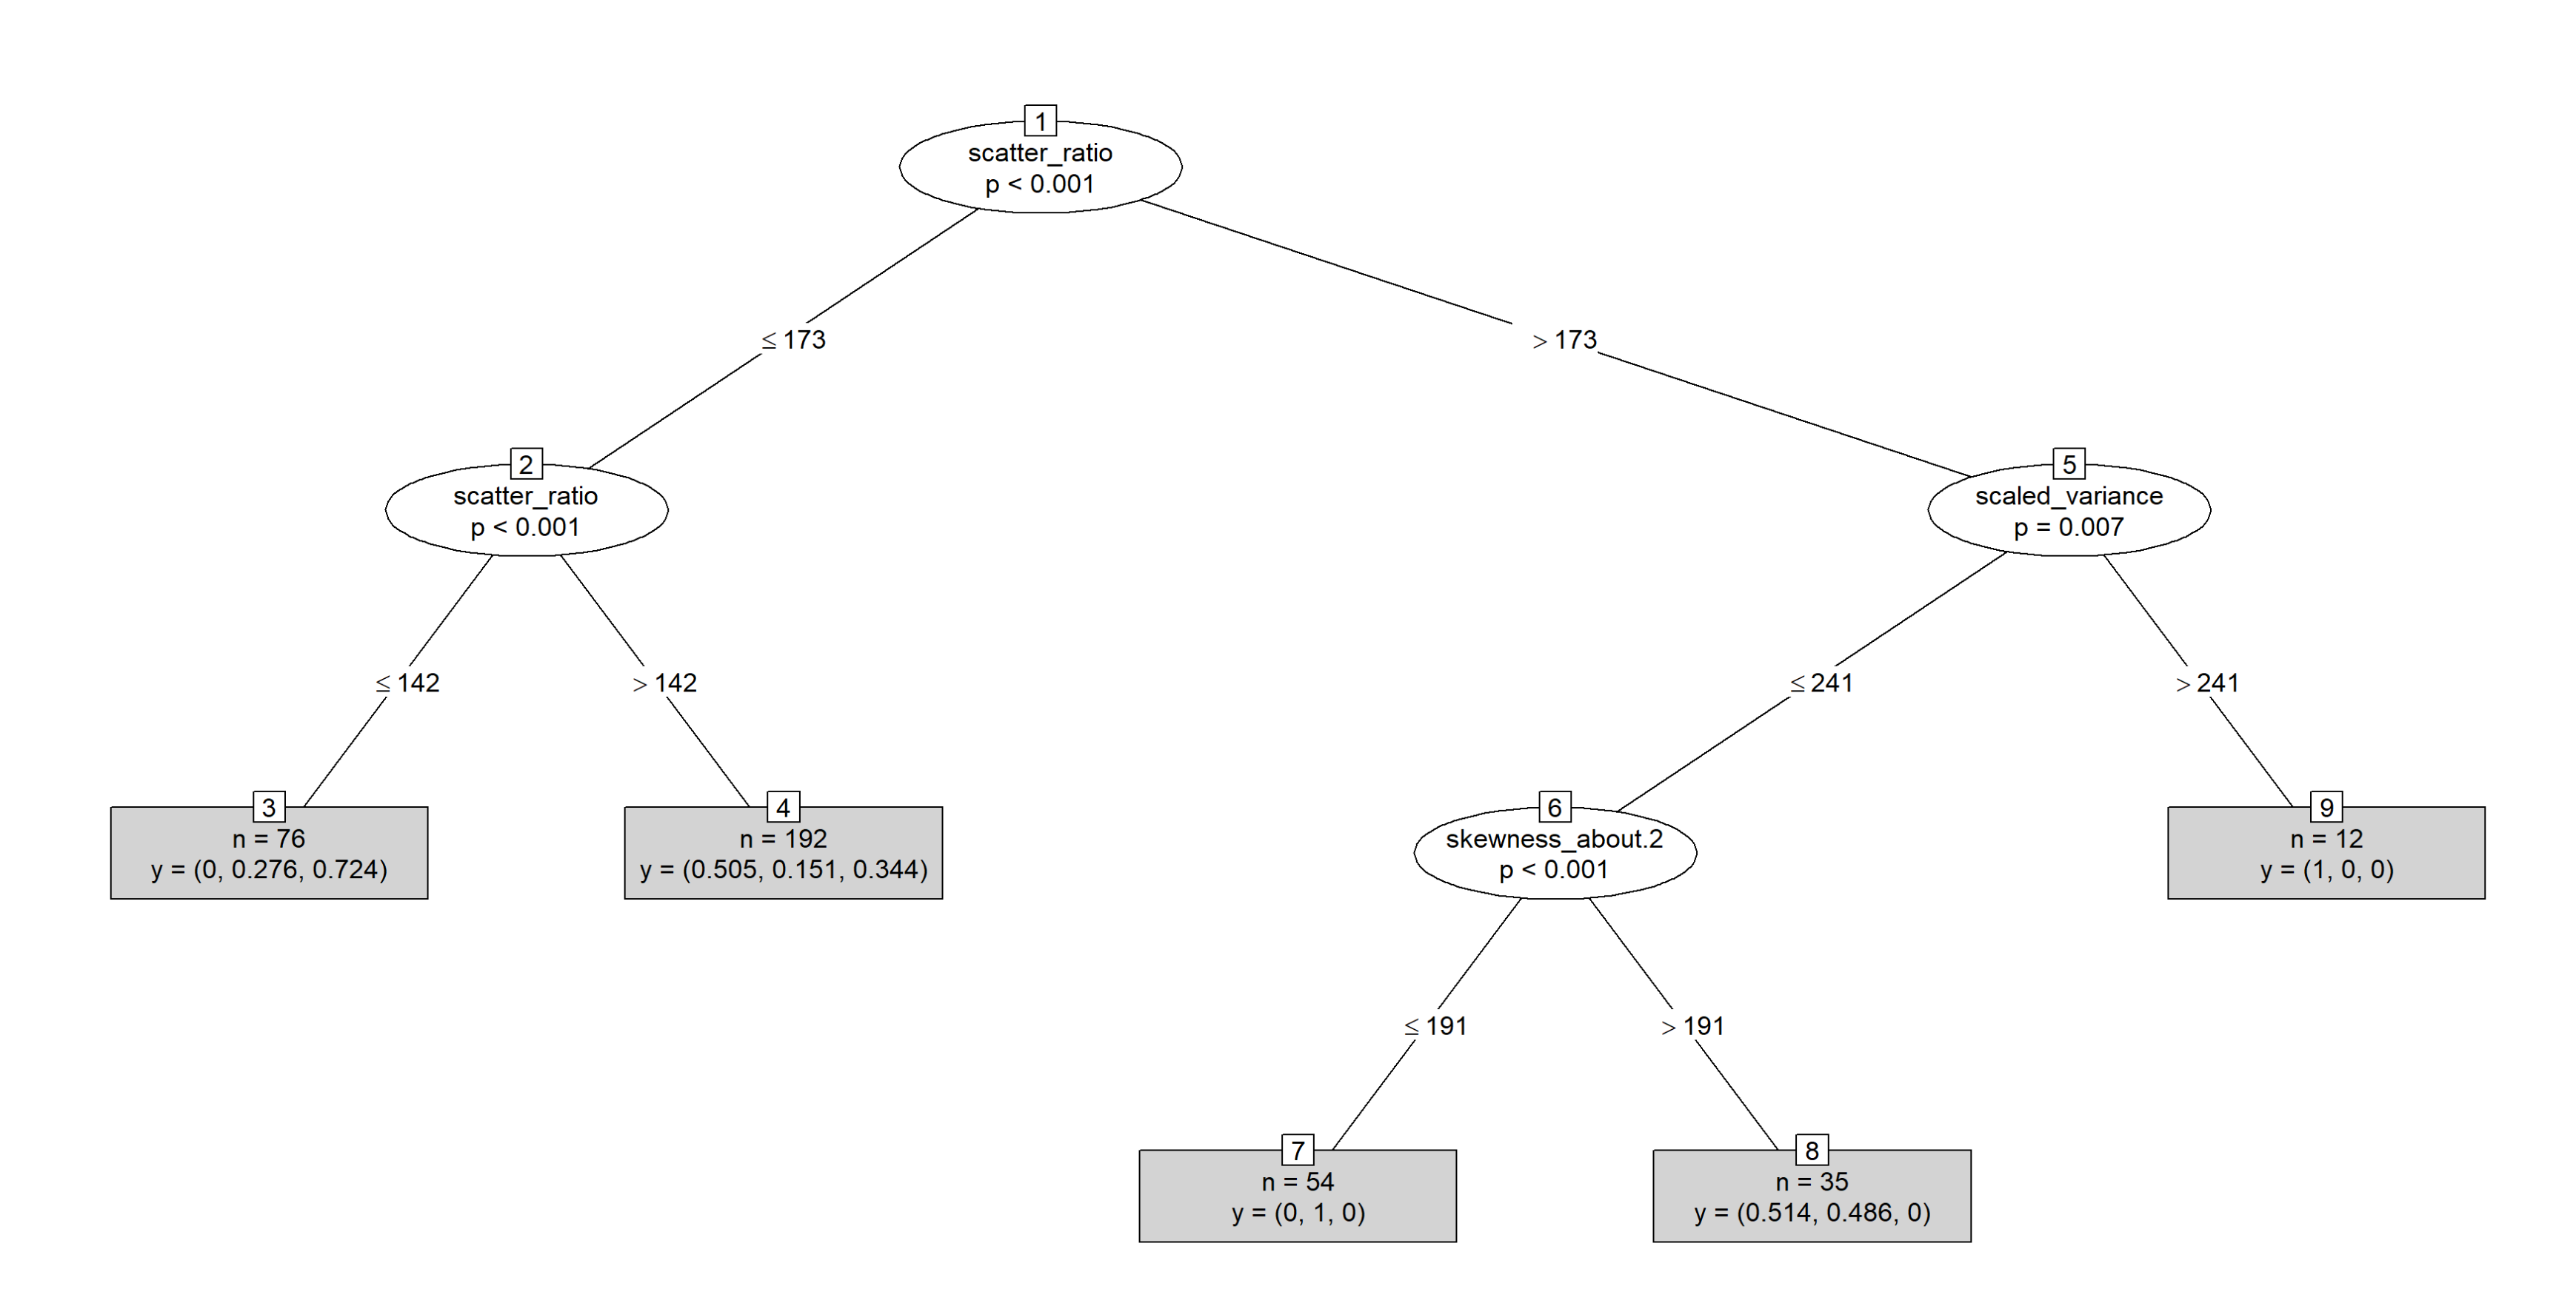

In [ ]:
# 6. Use the model to predict the class labels of the test data
testPred <- predict(dataset.ctree, newdata = test.data)
result <- table(testPred, test.data$Class)

In [ ]:
# 7. Evaluate the model
co_result <- confusionMatrix(result)
print(co_result)


# Extracting sensitivity and specificity from the table in co_result
table_matrix <- co_result$table

# Extracting true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)
TP <- table_matrix[2, 2]  # True Positive
TN <- sum(diag(table_matrix)) - sum(table_matrix[2, ]) - sum(table_matrix[, 2]) + TP  # True Negative
FP <- sum(table_matrix[, 2]) - TP  # False Positive
FN <- sum(table_matrix[2, ]) - TP  # False Negative

# Calculate sensitivity and specificity
sensitivity <- TP / (TP + FN)
specificity <- TN / (TN + FP)

# Print the sensitivity and specificity
print(sensitivity)
print(specificity)




accuracy <- co_result$overall["Accuracy"]
accuracy


<pre>
Confusion Matrix and Statistics

        
testPred  1  2  3
       1 65 26 30
       2  5 37  0
       3  2 15 48

Overall Statistics
                                          
               Accuracy : 0.6579          
                 95% CI : (0.5924, 0.7192)
    No Information Rate : 0.3421          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4908          
                                          
 Mcnemar's Test P-Value : 1.284e-11       

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9028   0.4744   0.6154
Specificity            0.6410   0.9667   0.8867
Pos Pred Value         0.5372   0.8810   0.7385
Neg Pred Value         0.9346   0.7796   0.8160
Prevalence             0.3158   0.3421   0.3421
Detection Rate         0.2851   0.1623   0.2105
Detection Prevalence   0.5307   0.1842   0.2851
Balanced Accuracy      0.7719   0.7205   0.7510
        </pre>

<pre>
> print(sensitivity)
[1] 0.8809524
> print(specificity)
[1] 0.6203704
</pre>

<pre> Accuracy 
0.6578947 
</pre>

<h2>2.Clustering</h2>

<p>Clustering, an unsupervised machine learning technique, involves organizing a collection of data points into distinct subsets or "clusters." The aim is to unite similar data points within each cluster while keeping them distinct from those in other clusters. In this method, we'll experiment with three different 'k' sizes (number of clusters). Subsequently, we'll employ evaluation techniques to compare these various 'k' sizes and determine which one best suits our dataset.For every different size of k we will try a different method of clustering.</p>

In [90]:
##Lets first start by remocing the Class column since clustering is unsupervised leaning
datacluster <- dataset[, -18]
##lets set seed which is random number generation
set.seed(9000)




<h3>2.1:Kmean size 3</h3>

In [91]:
##Letz now run k-mean to find 3 clusters
kmeanResult<- kmeans(datacluster,3)

In [92]:
##Lets print the result
kmeanResult

K-means clustering with 3 clusters of sizes 27, 288, 531

Cluster means:
  compactness circularity distance_circularity radius_ratio
1   107.03704    54.18519            102.51852     189.1852
2   101.26736    50.69097             98.30556     203.2951
3    88.88324    41.16573             72.27307     149.1733
  pr.axis_aspect_ratio max.length_aspect_ratio scatter_ratio elongatedness
1             56.00000                5.666667      246.0370      27.14815
2             64.92014               10.781250      202.1875      32.97917
3             60.20716                7.514124      146.9040      45.95292
  max.length_rectangularity scaled_variance scaled_variance.1
1                  167.2593        269.3704         0.8509637
2                  160.9722        218.6562         0.5126982
3                  139.9831        168.1864         0.1663934
  scaled_radius_of_gyration scaled_radius_of_gyration.1 skewness_about
1                  243.9259                    83.37037       6.2592

<h5>Lets check different visualization to analyze the cluster size we have chosen.</h5>

<h4>Visual 1</h4>

In [ ]:
##Lets visualize the cluster
library(factoextra)
fviz_cluster(kmeanResult, data = datacluster)

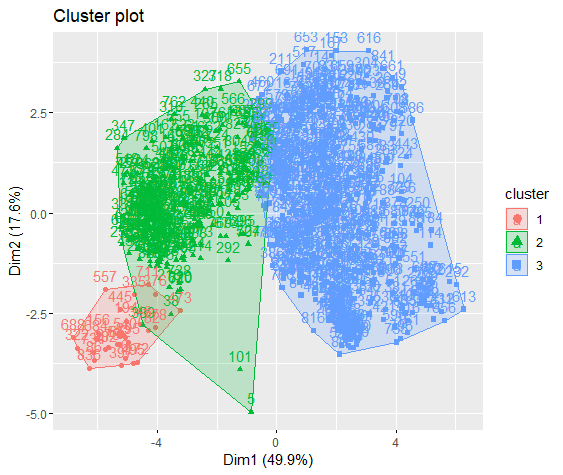



<p>From the visualization, using three clusters may or may not be the most suitable choice. While there's observable coherence within the three clusters, there remains some overlap or interaction between distinct clusters. This indicates the need for further examination to determine the optimal cluster number for this dataset.</p>

<h4>Visual 2</h4>

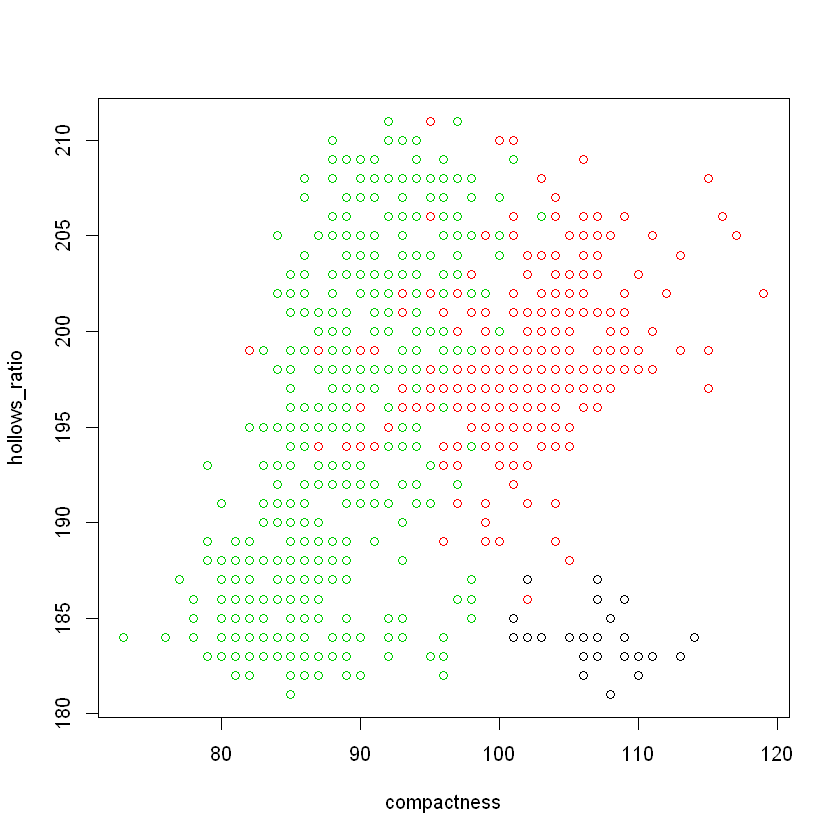

In [93]:
# plot cluster points and lets choose 2 attribute to plot
plot(datacluster[, c("compactness","hollows_ratio")], col = (kmeanResult$cluster) )



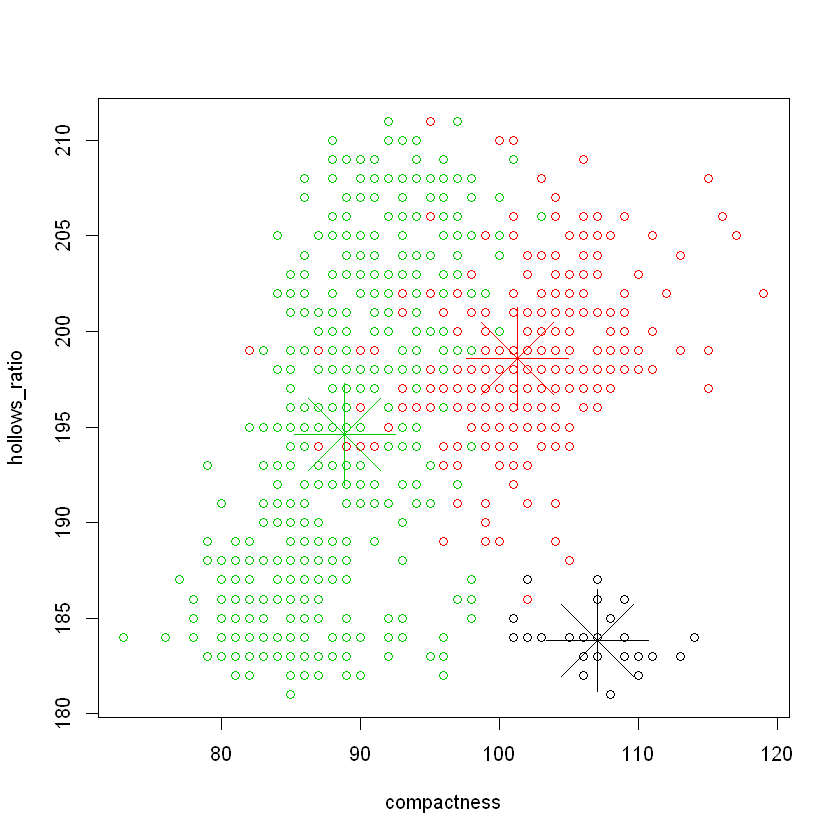

In [94]:

plot(datacluster[, c("compactness", "hollows_ratio")], col = kmeanResult$cluster)

# Add cluster centers to the existing plot
points(kmeanResult$centers[, c("compactness", "hollows_ratio")], col = 1:4, pch = 8, cex = 8)

<P>The cluster centers are accurately positioned in the middle of each respective cluster. Nevertheless, there is apparent overlap occurring between two of the clusters..</p>

<h3>2.2:Kmean size 4</h3>

In [118]:
##Letz now run k-mean to find 4 clusters
kmeanResult<- kmeans(datacluster,4)

In [96]:
##Lets print the result
kmeanResult

K-means clustering with 4 clusters of sizes 253, 317, 249, 27

Cluster means:
  compactness circularity distance_circularity radius_ratio
1    92.37154    42.38340             80.05534     174.6561
2    86.95268    40.62461             67.81703     134.8233
3   102.12048    51.63454            100.14859     204.1486
4   107.03704    54.18519            102.51852     189.1852
  pr.axis_aspect_ratio max.length_aspect_ratio scatter_ratio elongatedness
1             64.74704                8.470356      160.0514      41.47826
2             57.52366                7.189274      139.9685      48.47634
3             64.46185               10.734940      206.3173      32.28112
4             56.00000                5.666667      246.0370      27.14815
  max.length_rectangularity scaled_variance scaled_variance.1
1                  142.3241        182.3399         0.2425949
2                  138.9274        160.6751         0.1270908
3                  163.2249        221.7430         0.5395491

<h6>Visual 1</h6>

In [ ]:
fviz_cluster(kmeanResult, data = datacluster)

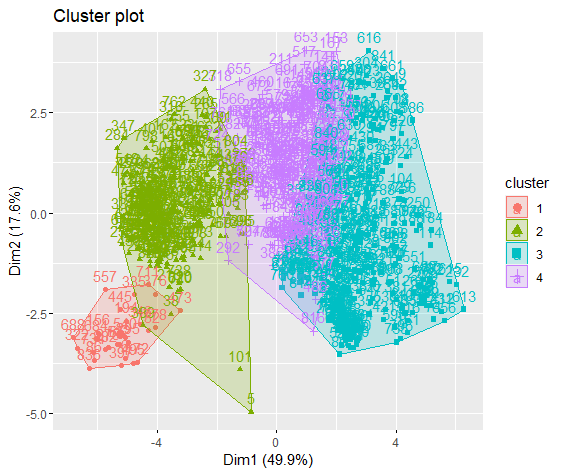

<p>This visual representation illustrates that opting for four clusters produced an even poorer outcome compared to three clusters. The considerable collision observed between the clusters signifies that choosing four clusters might not be a suitable option, highlighting the need for a more refined selection of 'k' for this dataset.</p>

<h6>Visual 2</h6>

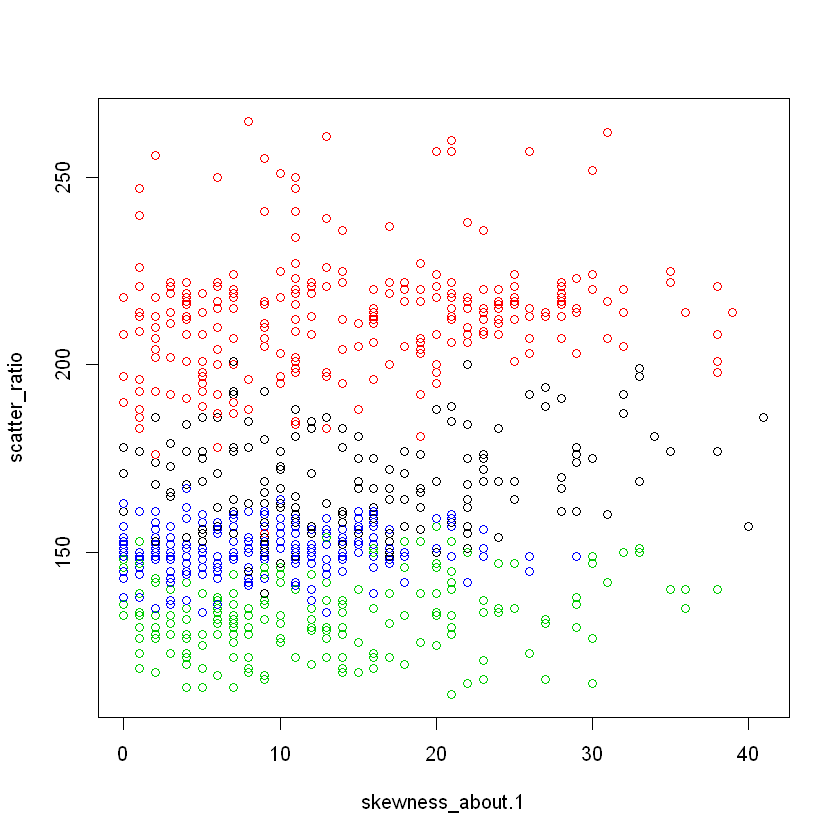

In [120]:
##lets plot but this time choose 2 different attributes than the one we chose with the 3 clusters
plot(datacluster[, c("skewness_about.1","scatter_ratio")], col = (kmeanResult$cluster) )

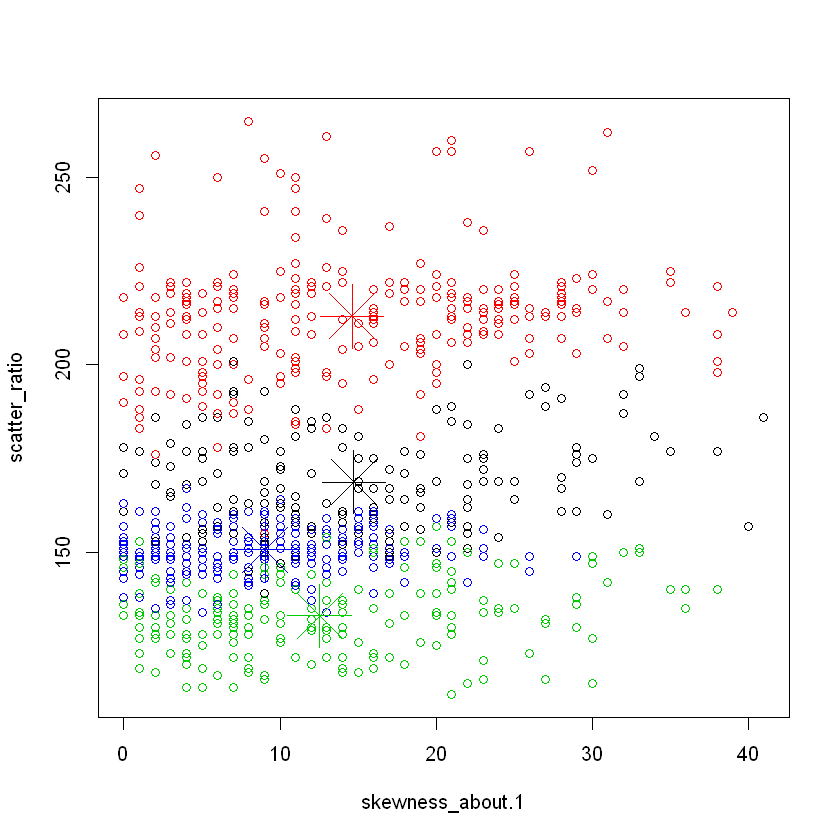

In [121]:
plot(datacluster[, c("skewness_about.1", "scatter_ratio")], col = kmeanResult$cluster)

# Add cluster centers to the existing plot
points(kmeanResult$centers[, c("skewness_about.1", "scatter_ratio")], col = 1:4, pch = 8, cex = 5)

<p>The second visual shows two well-distributed clusters and two with substantial overlap, implying the possibility of merging. This suggests that, upon analysis, the choice of three clusters seems more appropriate than four, offering a more accurate representation of the data.</p>

<h3>2.3:Kmean size 2</h3>

In [102]:
##Letz now run k-mean to find 2 clusters
kmeanResult<- kmeans(datacluster,2)

In [103]:
##Lets print the result
kmeanResult

K-means clustering with 2 clusters of sizes 301, 545

Cluster means:
  compactness circularity distance_circularity radius_ratio
1   102.01329    51.33223             99.33223     202.4385
2    89.07523    41.22936             72.58349     150.3376
  pr.axis_aspect_ratio max.length_aspect_ratio scatter_ratio elongatedness
1             64.03322               10.478405      207.4718      32.23920
2             60.37615                7.511927      147.5780      45.73945
  max.length_rectangularity scaled_variance scaled_variance.1
1                  162.3455        224.3854         0.5517500
2                  140.0752        168.8312         0.1704794
  scaled_radius_of_gyration scaled_radius_of_gyration.1 skewness_about
1                  206.8970                    72.46179       7.036545
2                  156.9284                    72.43303       5.988991
  skewness_about.1 skewness_about.2 hollows_ratio
1         14.52492         189.3056      197.1329
2         11.53761         

<h5>Visual 1</h5>

In [ ]:
fviz_cluster(kmeanResult, data = datacluster)

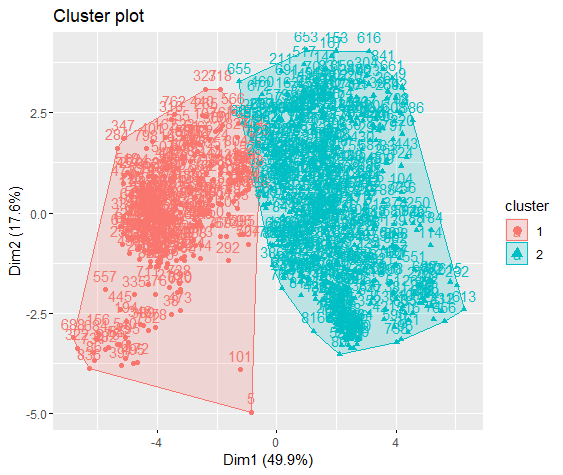

<p>This visualization shows an improvement over the previous two clusters as the clustering is better grouped, with minimal observed overlap.</p>

<h5>Visual 2</h5>

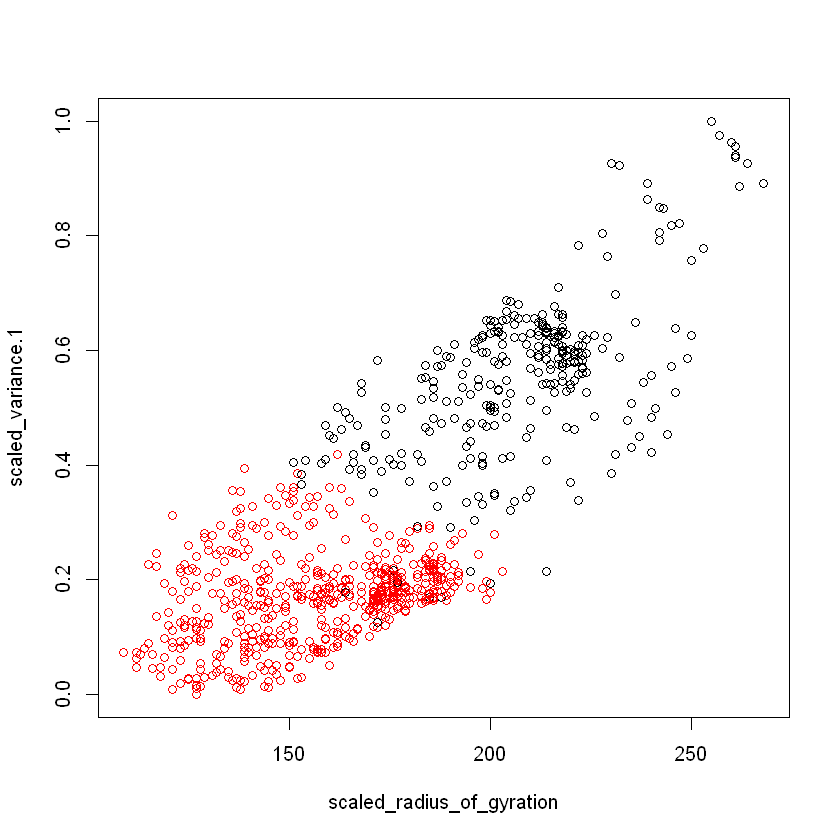

In [104]:
##lets plot but this time choose 2 different attributes than the one we chose with the 3 clusters
plot(datacluster[, c("scaled_radius_of_gyration","scaled_variance.1")], col = (kmeanResult$cluster) )

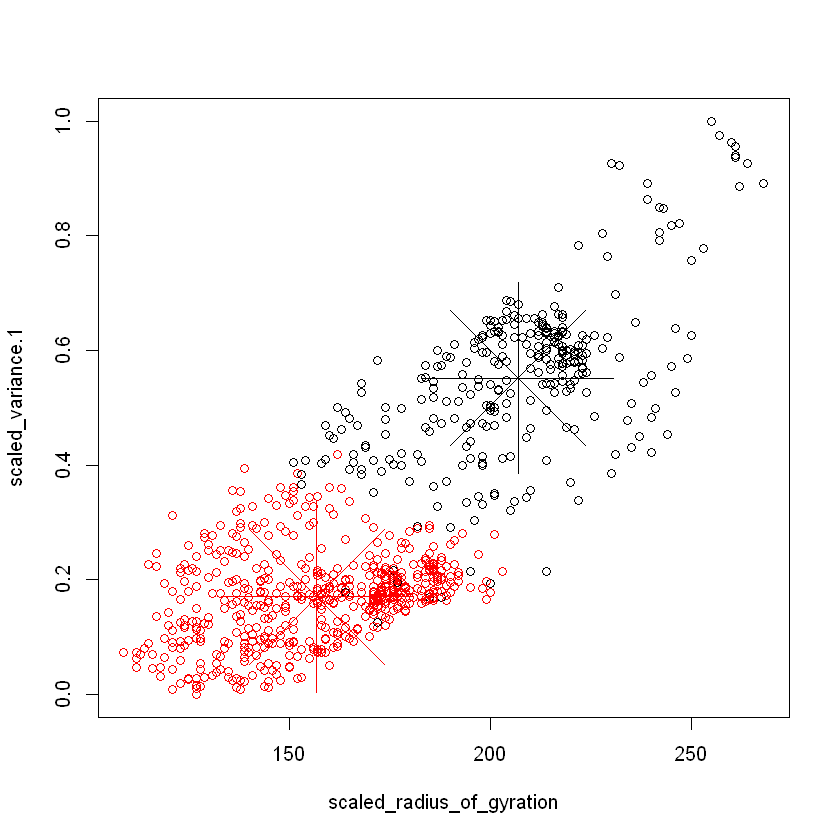

In [105]:
plot(datacluster[, c("scaled_radius_of_gyration", "scaled_variance.1")], col = kmeanResult$cluster)

# Add cluster centers to the existing plot
points(kmeanResult$centers[, c("scaled_radius_of_gyration", "scaled_variance.1")], col = 1:4, pch = 8, cex = 15)

<p>The visualization suggests that opting for two clusters is the better choice, given that similar clusters are more tightly grouped together, resulting in a more distinct representation of the clusters.</p>

<h3>The analysis</h3>
<p>In summary, the examination of different cluster sizes demonstrates their varying impact on the accuracy of representing the data. Evaluating overlaps and the cohesion within clusters illustrates the substantial influence of the chosen cluster number on the quality and clarity of the resulting clusters. The initial analysis began with three clusters, aligning with the original class label count. Subsequently, the addition of an extra cluster did not yield improved results, and the exploration continued by reducing the cluster count, which visually demonstrated better clustering than with four clusters.</p>

<h2>Evaluation Methods</h2>

<p>Upon testing various 'k' sizes, we aim to assess the optimal number of clusters for our dataset. To achieve this, we will utilize evaluation methods that assist in identifying the most suitable 'k' value, best aligning with our data. </p>

<h3>A.Elbow method</h3>

In [106]:
fviz_nbclust(datacluster, kmeans, method = "wss")

ERROR: Error in fviz_nbclust(datacluster, kmeans, method = "wss"): could not find function "fviz_nbclust"


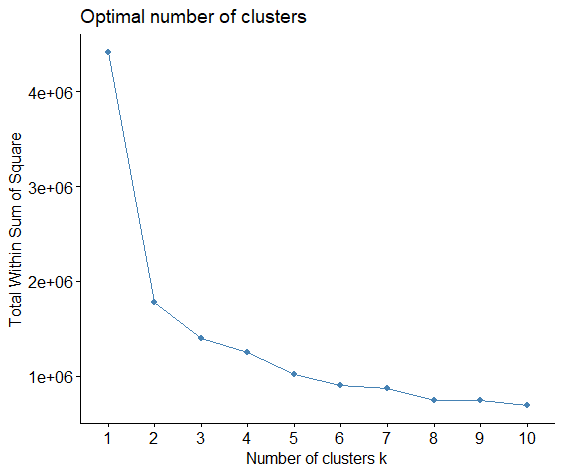

<p>According to the elbow method we can conclud that the best fitted k is 3</p>

<h3>B.Silhouette method</h3>

<h4>B.1.fviz_nbclust</h4>

In [ ]:
library(NbClust)
fviz_nbclust(datacluster, kmeans, method = "silhouette")

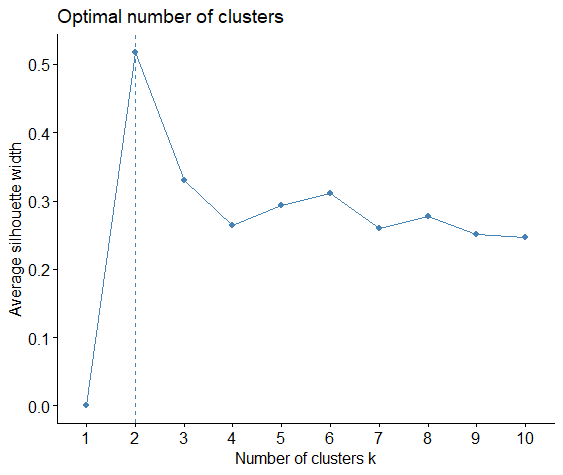

<p>According to graph above the best number of k for our dataset is 2</p>

<h4>B.1.NbClust validation</h4>

In [ ]:
fres.nbclust <- NbClust(datacluster, distance="manhattan", min.nc = 2, max.nc = 10, method="kmeans", index="all")

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 12 proposed 2 as the best number of clusters 
* 4 proposed 3 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 2 proposed 8 as the best number of clusters 
* 2 proposed 9 as the best number of clusters 
* 3 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 

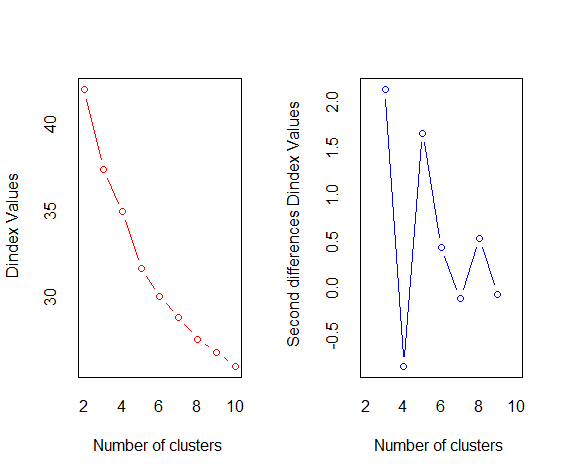

<p>According to the graph above and conclution given the best number of k is 2.</p>

<h3>Analysis Conclution</h3>

<p>After conducting a comprehensive analysis by testing three varying cluster sizes, our findings consistently advocate for two clusters as the most optimal representation of our data. Subsequently, we explored three distinct evaluation methods, with two of these methodologies concurring that two clusters align best with the inherent structure of our data. Therefore, from both the exploratory k-means trials and the supportive evaluation techniques, it’s evident that our dataset is most suitably represented by two clusters.</p>